In [1]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

File: predicted_2018.tif
Transform: | 0.00, 0.00, 12.09|
| 0.00,-0.00, 51.06|
| 0.00, 0.00, 1.00|
CRS: EPSG:4326
Converting from degrees to meters
Disturbed pixels count: 4668088
Pixel dimensions: 10.000045742818514m x 10.000045742818514m
Area per pixel: 100.00091485846269 sq meters = 0.010000091485846269 hectares
Total disturbed area: 46681.307063981134 hectares

File: predicted_2019.tif
Transform: | 0.00, 0.00, 12.09|
| 0.00,-0.00, 51.06|
| 0.00, 0.00, 1.00|
CRS: EPSG:4326
Converting from degrees to meters
Disturbed pixels count: 5549197
Pixel dimensions: 10.000045742818514m x 10.000045742818514m
Area per pixel: 100.00091485846269 sq meters = 0.010000091485846269 hectares
Total disturbed area: 55492.47767298366 hectares

File: predicted_2020.tif
Transform: | 0.00, 0.00, 12.09|
| 0.00,-0.00, 51.06|
| 0.00, 0.00, 1.00|
CRS: EPSG:4326
Converting from degrees to meters
Disturbed pixels count: 7024340
Pixel dimensions: 10.000045742818514m x 10.000045742818514m
Area per pixel: 100.00091485

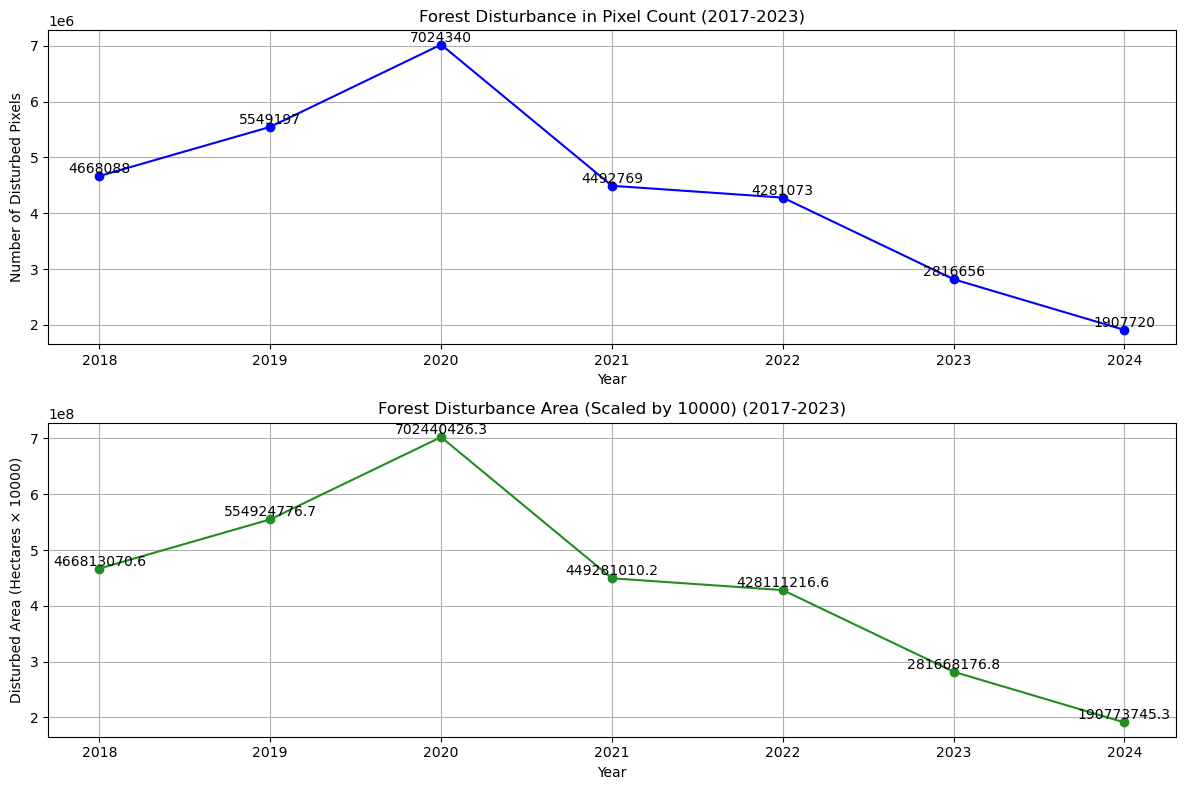

   Year  Disturbed Pixels  Disturbed Hectares  Scaled Hectares
0  2018           4668088        46681.307064     4.668131e+08
1  2019           5549197        55492.477673     5.549248e+08
2  2020           7024340        70244.042628     7.024404e+08
3  2021           4492769        44928.101025     4.492810e+08
4  2022           4281073        42811.121658     4.281112e+08
5  2023           2816656        28166.817684     2.816682e+08
6  2024           1907720        19077.374529     1.907737e+08


In [2]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the area in hectares with value 1
def calculate_disturbed_hectares(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        disturbed_pixels = np.sum(data == 1)  # Pixels with value 1
        
        # Get the full transform information
        transform = src.transform
        print(f"File: {raster_path}")
        print(f"Transform: {transform}")
        print(f"CRS: {src.crs}")
        
        # Get the pixel resolution in a more robust way
        if hasattr(src, 'res'):
            # Use resolution directly if available
            pixel_width, pixel_height = src.res
        else:
            # Use transform attributes
            pixel_width = abs(transform[0])
            pixel_height = abs(transform[4])
        
        # If pixel dimensions seem to be in degrees (very small numbers), convert to meters
        # Assuming approximately 111,320 meters per degree at the equator for a rough conversion
        if pixel_width < 0.01:  # Likely in degrees
            meters_per_degree = 111320
            pixel_width = pixel_width * meters_per_degree
            pixel_height = pixel_height * meters_per_degree
            print("Converting from degrees to meters")
        
        # Calculate area per pixel in square meters
        area_per_pixel_sqm = pixel_width * pixel_height
        
        # Convert to hectares (1 hectare = 10,000 square meters)
        area_per_pixel_ha = area_per_pixel_sqm / 10000
        
        # Calculate total area in hectares
        disturbed_hectares = disturbed_pixels * area_per_pixel_ha
        
        # Print detailed debugging information
        print(f"Disturbed pixels count: {disturbed_pixels}")
        print(f"Pixel dimensions: {pixel_width}m x {pixel_height}m")
        print(f"Area per pixel: {area_per_pixel_sqm} sq meters = {area_per_pixel_ha} hectares")
        print(f"Total disturbed area: {disturbed_hectares} hectares\n")
        
    return disturbed_hectares, disturbed_pixels

# Paths to your disturbance raster files
disturbance_rasters = {
    "2018": "predicted_2018.tif",
    "2019": "predicted_2019.tif",
    "2020": "predicted_2020.tif",
    "2021": "predicted_2021.tif",
    "2022": "predicted_2022.tif",
    "2023": "predicted_2023.tif",
    "2024": "predicted_2024.tif"
}

# Calculate disturbed hectares for the predicted dataset
results = []
for year in disturbance_rasters.keys():
    disturbed_hectares, disturbed_pixels = calculate_disturbed_hectares(disturbance_rasters[year])
    results.append({
        "Year": year,
        "Disturbed Hectares": disturbed_hectares,
        "Disturbed Pixels": disturbed_pixels
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Alternative 1: If hectares are still very small, let's try showing the raw pixel counts
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(results_df["Year"], results_df["Disturbed Pixels"], label="Disturbed Pixels", marker='o', color='blue')
plt.xlabel("Year")
plt.ylabel("Number of Disturbed Pixels")
plt.title("Forest Disturbance in Pixel Count (2017-2023)")
plt.grid(True)
for i, value in enumerate(results_df["Disturbed Pixels"]):
    plt.text(i, value, f"{value}", ha='center', va='bottom')

# Alternative 2: Plot with a scaling factor to make the values more readable
plt.subplot(2, 1, 2)
scaling_factor = 10000  # Adjust this as needed
results_df["Scaled Hectares"] = results_df["Disturbed Hectares"] * scaling_factor
plt.plot(results_df["Year"], results_df["Scaled Hectares"], 
         label=f"Disturbed Area (× {scaling_factor})", marker='o', color='forestgreen')
plt.xlabel("Year")
plt.ylabel(f"Disturbed Area (Hectares × {scaling_factor})")
plt.title(f"Forest Disturbance Area (Scaled by {scaling_factor}) (2017-2023)")
plt.grid(True)
for i, value in enumerate(results_df["Scaled Hectares"]):
    plt.text(i, value, f"{value:.1f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display the results dataframe with both raw pixels and hectares
print(results_df[["Year", "Disturbed Pixels", "Disturbed Hectares", "Scaled Hectares"]])

File: loss_year_2017.tif
Transform: | 0.00, 0.00, 12.09|
| 0.00,-0.00, 51.06|
| 0.00, 0.00, 1.00|
CRS: EPSG:4326
Converting from degrees to meters
Disturbed pixels count: 470508
Pixel dimensions: 30.000137228455536m x 30.000137228455536m
Area per pixel: 900.0082337261638 sq meters = 0.09000082337261638 hectares
Total disturbed area: 42346.10740340299 hectares

File: loss_year_2018.tif
Transform: | 0.00, 0.00, 12.09|
| 0.00,-0.00, 51.06|
| 0.00, 0.00, 1.00|
CRS: EPSG:4326
Converting from degrees to meters
Disturbed pixels count: 687166
Pixel dimensions: 30.000137228455536m x 30.000137228455536m
Area per pixel: 900.0082337261638 sq meters = 0.09000082337261638 hectares
Total disturbed area: 61845.505793667304 hectares

File: loss_year_2019.tif
Transform: | 0.00, 0.00, 12.09|
| 0.00,-0.00, 51.06|
| 0.00, 0.00, 1.00|
CRS: EPSG:4326
Converting from degrees to meters
Disturbed pixels count: 1288143
Pixel dimensions: 30.000137228455536m x 30.000137228455536m
Area per pixel: 900.0082337261638 

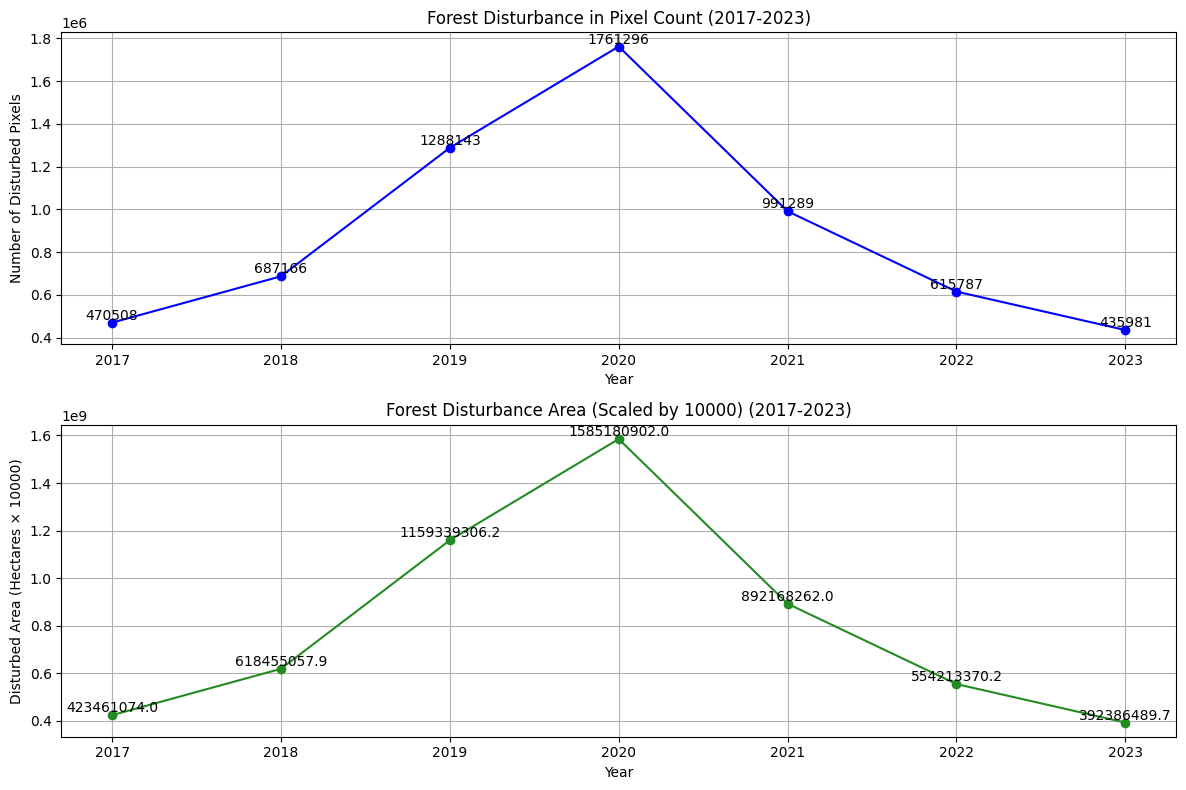

   Year  Disturbed Pixels  Disturbed Hectares  Scaled Hectares
0  2017            470508        42346.107403     4.234611e+08
1  2018            687166        61845.505794     6.184551e+08
2  2019           1288143       115933.930622     1.159339e+09
3  2020           1761296       158518.090203     1.585181e+09
4  2021            991289        89216.826200     8.921683e+08
5  2022            615787        55421.337022     5.542134e+08
6  2023            435981        39238.648975     3.923865e+08


In [5]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the area in hectares with value 1
def calculate_disturbed_hectares(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        disturbed_pixels = np.sum(data == 1)  # Pixels with value 1
        
        # Get the full transform information
        transform = src.transform
        print(f"File: {raster_path}")
        print(f"Transform: {transform}")
        print(f"CRS: {src.crs}")
        
        # Get the pixel resolution in a more robust way
        if hasattr(src, 'res'):
            # Use resolution directly if available
            pixel_width, pixel_height = src.res
        else:
            # Use transform attributes
            pixel_width = abs(transform[0])
            pixel_height = abs(transform[4])
        
        # If pixel dimensions seem to be in degrees (very small numbers), convert to meters
        # Assuming approximately 111,320 meters per degree at the equator for a rough conversion
        if pixel_width < 0.01:  # Likely in degrees
            meters_per_degree = 111320
            pixel_width = pixel_width * meters_per_degree
            pixel_height = pixel_height * meters_per_degree
            print("Converting from degrees to meters")
        
        # Calculate area per pixel in square meters
        area_per_pixel_sqm = pixel_width * pixel_height
        
        # Convert to hectares (1 hectare = 10,000 square meters)
        area_per_pixel_ha = area_per_pixel_sqm / 10000
        
        # Calculate total area in hectares
        disturbed_hectares = disturbed_pixels * area_per_pixel_ha
        
        # Print detailed debugging information
        print(f"Disturbed pixels count: {disturbed_pixels}")
        print(f"Pixel dimensions: {pixel_width}m x {pixel_height}m")
        print(f"Area per pixel: {area_per_pixel_sqm} sq meters = {area_per_pixel_ha} hectares")
        print(f"Total disturbed area: {disturbed_hectares} hectares\n")
        
    return disturbed_hectares, disturbed_pixels

# Paths to your disturbance raster files
disturbance_rasters = {
    "2017": "loss_year_2017.tif",
    "2018": "loss_year_2018.tif",
    "2019": "loss_year_2019.tif",
    "2020": "loss_year_2020.tif",
    "2021": "loss_year_2021.tif",
    "2022": "loss_year_2022.tif",
    "2023": "loss_year_2023.tif"
}

# Calculate disturbed hectares for the predicted dataset
results = []
for year in disturbance_rasters.keys():
    disturbed_hectares, disturbed_pixels = calculate_disturbed_hectares(disturbance_rasters[year])
    results.append({
        "Year": year,
        "Disturbed Hectares": disturbed_hectares,
        "Disturbed Pixels": disturbed_pixels
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Alternative 1: If hectares are still very small, let's try showing the raw pixel counts
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(results_df["Year"], results_df["Disturbed Pixels"], label="Disturbed Pixels", marker='o', color='blue')
plt.xlabel("Year")
plt.ylabel("Number of Disturbed Pixels")
plt.title("Forest Disturbance in Pixel Count (2017-2023)")
plt.grid(True)
for i, value in enumerate(results_df["Disturbed Pixels"]):
    plt.text(i, value, f"{value}", ha='center', va='bottom')

# Alternative 2: Plot with a scaling factor to make the values more readable
plt.subplot(2, 1, 2)
scaling_factor = 10000  # Adjust this as needed
results_df["Scaled Hectares"] = results_df["Disturbed Hectares"] * scaling_factor
plt.plot(results_df["Year"], results_df["Scaled Hectares"], 
         label=f"Disturbed Area (× {scaling_factor})", marker='o', color='forestgreen')
plt.xlabel("Year")
plt.ylabel(f"Disturbed Area (Hectares × {scaling_factor})")
plt.title(f"Forest Disturbance Area (Scaled by {scaling_factor}) (2017-2023)")
plt.grid(True)
for i, value in enumerate(results_df["Scaled Hectares"]):
    plt.text(i, value, f"{value:.1f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display the results dataframe with both raw pixels and hectares
print(results_df[["Year", "Disturbed Pixels", "Disturbed Hectares", "Scaled Hectares"]])

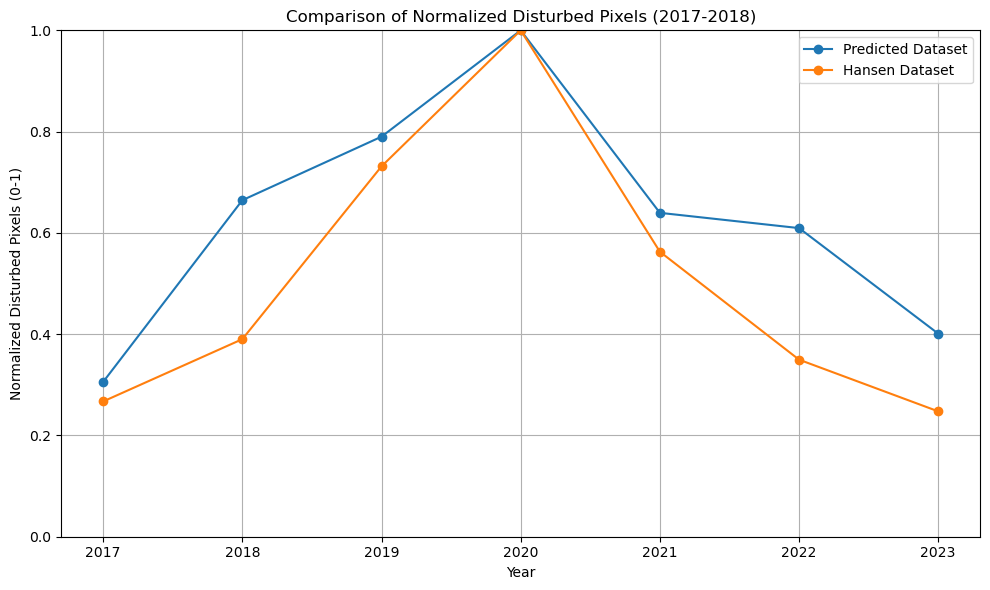

In [8]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the number of pixels with value 1
def calculate_disturbed_pixels(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        disturbed_pixels = np.sum(data == 1)  # Pixels with value 1
    return disturbed_pixels

# Paths to your disturbance raster files and Hansen dataset rasters
disturbance_rasters = {
    "2017": "predicted_2017.tif",
    "2018": "predicted_2018.tif",
    "2019": "predicted_2019.tif",
    "2020": "predicted_2020.tif",
    "2021": "predicted_2021.tif",
    "2022": "predicted_2022.tif",
    "2023": "predicted_2023.tif"
}
hansen_rasters = {
    "2017": "loss_year_2017.tif",
    "2018": "loss_year_2018.tif",
    "2019": "loss_year_2019.tif",
    "2020": "loss_year_2020.tif",
    "2021": "loss_year_2021.tif",
    "2022": "loss_year_2022.tif",
    "2023": "loss_year_2023.tif"
    

}

# Calculate disturbed pixels for both datasets
results = []
for year in disturbance_rasters.keys():
    disturbed_user = calculate_disturbed_pixels(disturbance_rasters[year])
    disturbed_hansen = calculate_disturbed_pixels(hansen_rasters[year])
    results.append({
        "Year": year,
        "Disturbed Pixels (User)": disturbed_user,
        "Disturbed Pixels (Hansen)": disturbed_hansen
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Normalize disturbed pixels by dividing by the maximum value in each dataset
results_df["Normalized User"] = results_df["Disturbed Pixels (User)"] / results_df["Disturbed Pixels (User)"].max()
results_df["Normalized Hansen"] = results_df["Disturbed Pixels (Hansen)"] / results_df["Disturbed Pixels (Hansen)"].max()

# Plotting the normalized values
plt.figure(figsize=(10, 6))

# Plot normalized values for both datasets
plt.plot(results_df["Year"], results_df["Normalized User"], label="Predicted Dataset", marker='o')
plt.plot(results_df["Year"], results_df["Normalized Hansen"], label="Hansen Dataset", marker='o')

# Add labels, legend, and title
plt.xlabel("Year")
plt.ylabel("Normalized Disturbed Pixels (0-1)")
plt.title("Comparison of Normalized Disturbed Pixels (2017-2018)")
plt.ylim(0, 1)  # Ensuring y-axis is between 0 and 1
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


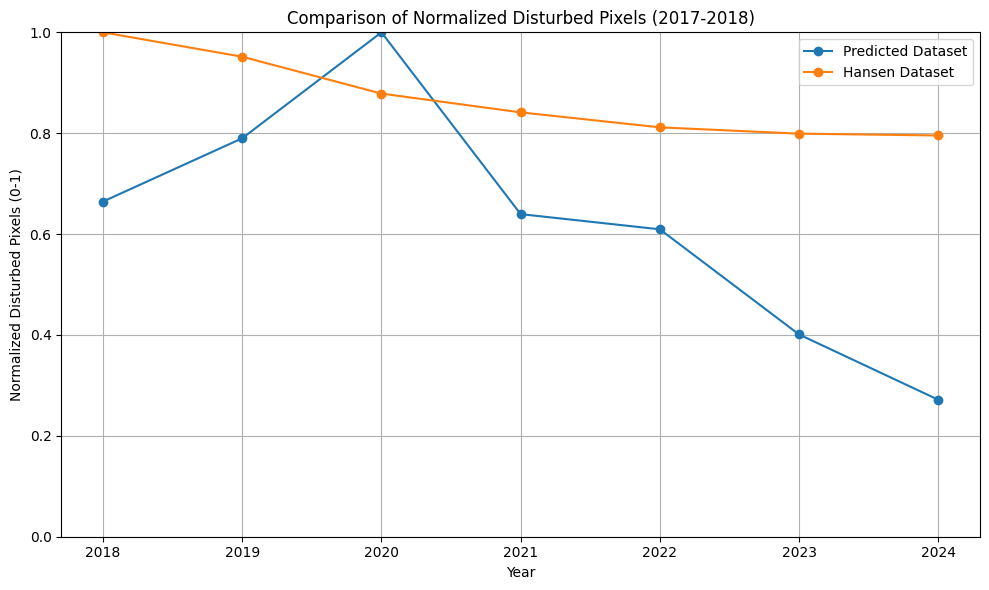

In [1]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the number of pixels with value 1
def calculate_disturbed_pixels(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        disturbed_pixels = np.sum(data == 1)  # Pixels with value 1
    return disturbed_pixels

# Paths to your disturbance raster files and Hansen dataset rasters
disturbance_rasters = {
    "2018": "predicted_2018.tif",
    "2019": "predicted_2019.tif",
    "2020": "predicted_2020.tif",
    "2021": "predicted_2021.tif",
    "2022": "predicted_2022.tif",
    "2023": "predicted_2023.tif",
    "2024": "predicted_2024.tif"
}
hansen_rasters = {
    "2018": "forest_2018_4.tif",
    "2019": "forest_2019_4.tif",
    "2020": "forest_2020_4.tif",
    "2021": "forest_2021_4.tif",
    "2022": "forest_2022_4.tif",
    "2023": "forest_2023_4.tif",
    "2024": "forest_2024_4.tif"
    

}

# Calculate disturbed pixels for both datasets
results = []
for year in disturbance_rasters.keys():
    disturbed_user = calculate_disturbed_pixels(disturbance_rasters[year])
    disturbed_hansen = calculate_disturbed_pixels(hansen_rasters[year])
    results.append({
        "Year": year,
        "Disturbed Pixels (User)": disturbed_user,
        "Disturbed Pixels (Hansen)": disturbed_hansen
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Normalize disturbed pixels by dividing by the maximum value in each dataset
results_df["Normalized User"] = results_df["Disturbed Pixels (User)"] / results_df["Disturbed Pixels (User)"].max()
results_df["Normalized Hansen"] = results_df["Disturbed Pixels (Hansen)"] / results_df["Disturbed Pixels (Hansen)"].max()

# Plotting the normalized values
plt.figure(figsize=(10, 6))

# Plot normalized values for both datasets
plt.plot(results_df["Year"], results_df["Normalized User"], label="Predicted Dataset", marker='o')
plt.plot(results_df["Year"], results_df["Normalized HaForest"], label="Lost forest", marker='o')

# Add labels, legend, and title
plt.xlabel("Year")
plt.ylabel("Normalized Disturbed Pixels (0-1)")
plt.title("Comparison of Normalized Disturbed Pixels (2018-2024)")
plt.ylim(0, 1)  # Ensuring y-axis is between 0 and 1
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


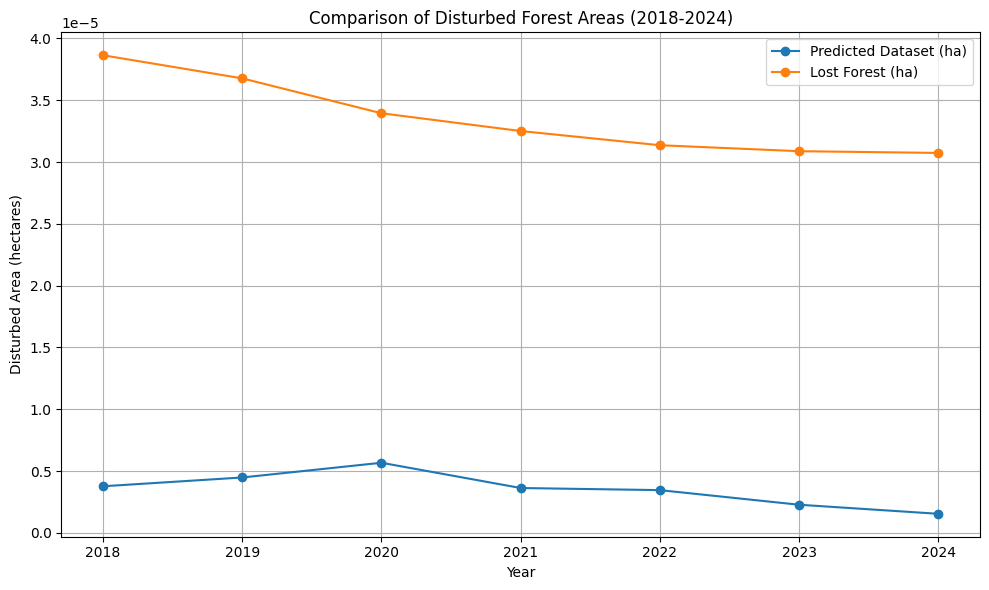

   Year  Disturbed Area (User) ha  Disturbed Area (Hansen) ha
0  2018                  0.000004                    0.000039
1  2019                  0.000004                    0.000037
2  2020                  0.000006                    0.000034
3  2021                  0.000004                    0.000033
4  2022                  0.000003                    0.000031
5  2023                  0.000002                    0.000031
6  2024                  0.000002                    0.000031


In [1]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the actual area of pixels with value 1
def calculate_disturbed_area(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        disturbed_pixels = np.sum(data == 1)  # Count pixels with value 1
        
        # Get pixel dimensions from the transform
        transform = src.transform
        pixel_width = abs(transform[0])
        pixel_height = abs(transform[4])
        
        # Calculate area per pixel (in square meters)
        pixel_area_m2 = pixel_width * pixel_height
        
        # Calculate total area (convert to hectares)
        disturbed_area_ha = (disturbed_pixels * pixel_area_m2) / 10000
        
    return disturbed_area_ha

# Paths to your disturbance raster files and Hansen dataset rasters
disturbance_rasters = {
    "2018": "predicted_2018.tif",
    "2019": "predicted_2019.tif",
    "2020": "predicted_2020.tif",
    "2021": "predicted_2021.tif",
    "2022": "predicted_2022.tif",
    "2023": "predicted_2023.tif",
    "2024": "predicted_2024.tif"
}

hansen_rasters = {
    "2018": "forest_2018_4.tif",
    "2019": "forest_2019_4.tif",
    "2020": "forest_2020_4.tif",
    "2021": "forest_2021_4.tif",
    "2022": "forest_2022_4.tif",
    "2023": "forest_2023_4.tif",
    "2024": "forest_2024_4.tif"
}

# Calculate actual disturbed areas for both datasets
results = []
for year in disturbance_rasters.keys():
    area_user = calculate_disturbed_area(disturbance_rasters[year])
    area_hansen = calculate_disturbed_area(hansen_rasters[year])
    results.append({
        "Year": year,
        "Disturbed Area (User) ha": area_user,
        "Disturbed Area (Hansen) ha": area_hansen
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plotting the actual areas
plt.figure(figsize=(10, 6))

# Plot actual area values for both datasets
plt.plot(results_df["Year"], results_df["Disturbed Area (User) ha"], 
         label="Predicted Dataset (ha)", marker='o')
plt.plot(results_df["Year"], results_df["Disturbed Area (Hansen) ha"], 
         label="Lost Forest (ha)", marker='o')

# Add labels, legend, and title
plt.xlabel("Year")
plt.ylabel("Disturbed Area (hectares)")
plt.title("Comparison of Disturbed Forest Areas (2018-2024)")
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the results table
print(results_df)

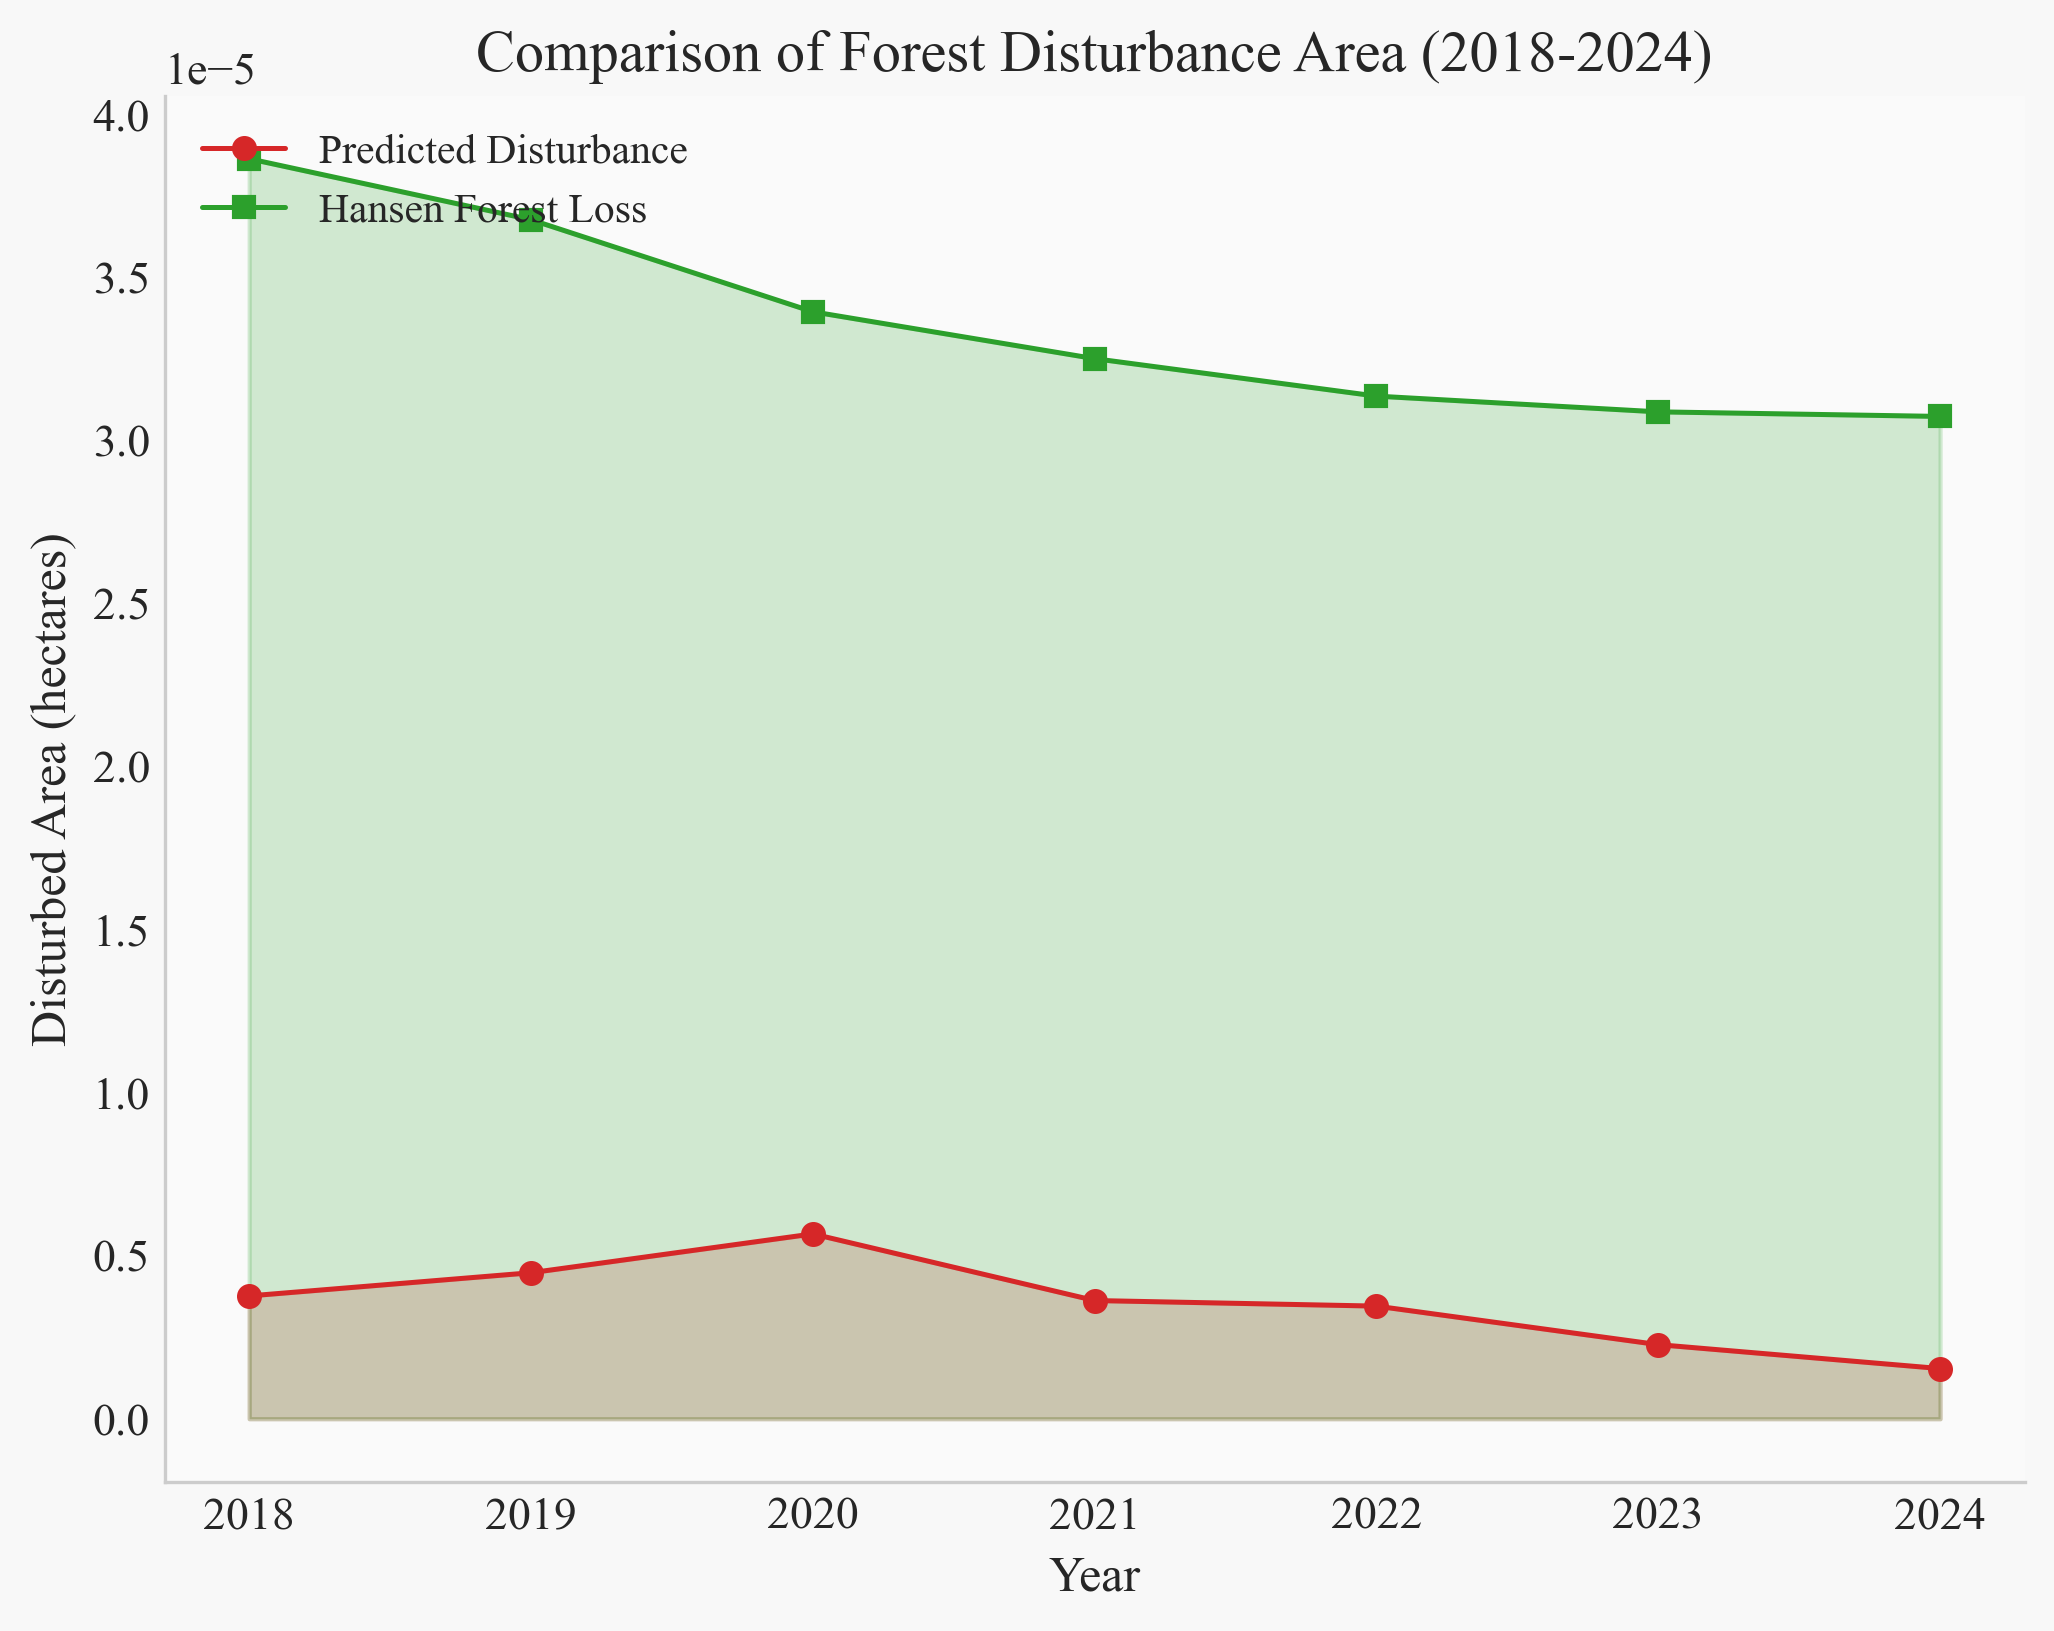

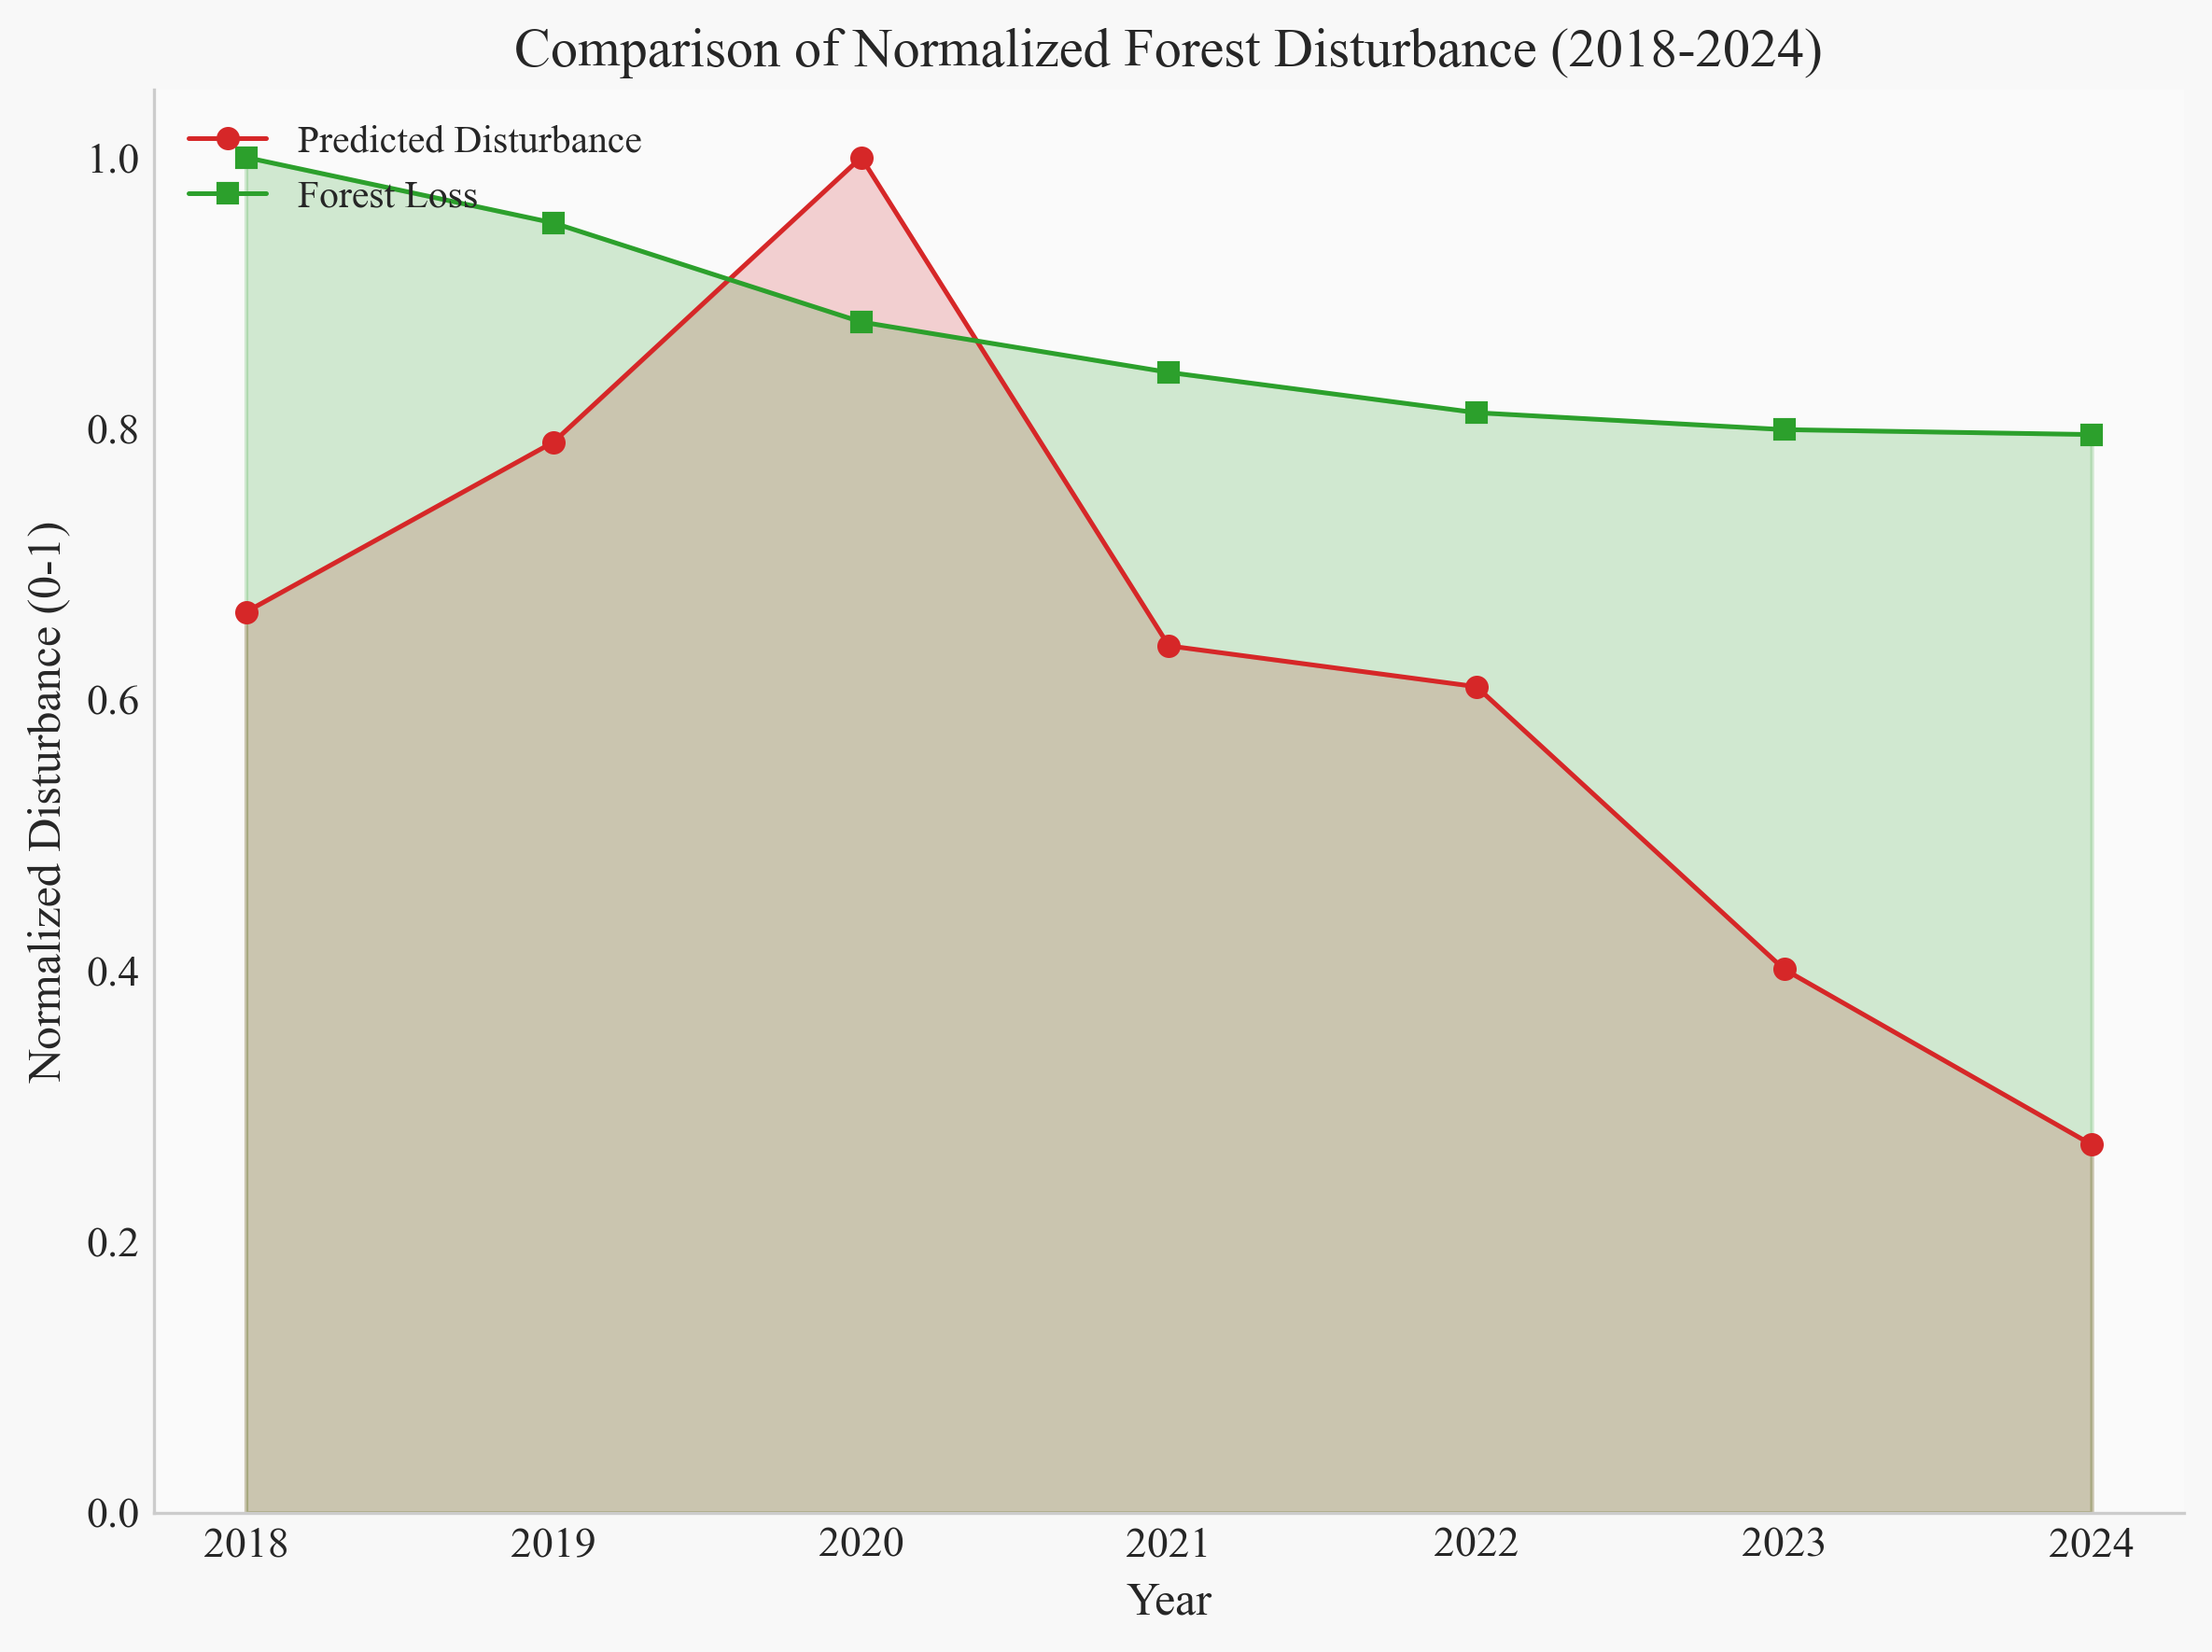

   Year  Disturbed Area (User) ha  Disturbed Area (Forest) ha  \
0  2018                  0.000004                    0.000039   
1  2019                  0.000004                    0.000037   
2  2020                  0.000006                    0.000034   
3  2021                  0.000004                    0.000033   
4  2022                  0.000003                    0.000031   
5  2023                  0.000002                    0.000031   
6  2024                  0.000002                    0.000031   

   Normalized User  Normalized Forest  
0         0.664559           1.000000  
1         0.789996           0.951624  
2         1.000000           0.878562  
3         0.639600           0.841352  
4         0.609463           0.811620  
5         0.400985           0.799131  
6         0.271587           0.795500  


In [5]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

# Use a clean, publication-quality style
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.titlesize'] = 14

# Function to calculate the actual area of pixels with value 1
def calculate_disturbed_area(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        disturbed_pixels = np.sum(data == 1)  # Count pixels with value 1
        
        # Get pixel dimensions from the transform
        transform = src.transform
        pixel_width = abs(transform[0])
        pixel_height = abs(transform[4])
        
        # Calculate area per pixel (in square meters)
        pixel_area_m2 = pixel_width * pixel_height
        
        # Calculate total area (convert to hectares)
        disturbed_area_ha = (disturbed_pixels * pixel_area_m2) / 10000
        
    return disturbed_area_ha

# Paths to your disturbance raster files and Hansen dataset rasters
disturbance_rasters = {
    "2018": "predicted_2018.tif",
    "2019": "predicted_2019.tif",
    "2020": "predicted_2020.tif",
    "2021": "predicted_2021.tif",
    "2022": "predicted_2022.tif",
    "2023": "predicted_2023.tif",
    "2024": "predicted_2024.tif"
}

hansen_rasters = {
    "2018": "forest_2018_4.tif",
    "2019": "forest_2019_4.tif",
    "2020": "forest_2020_4.tif",
    "2021": "forest_2021_4.tif",
    "2022": "forest_2022_4.tif",
    "2023": "forest_2023_4.tif",
    "2024": "forest_2024_4.tif"
}

# Calculate actual disturbed areas for both datasets
results = []
for year in disturbance_rasters.keys():
    area_user = calculate_disturbed_area(disturbance_rasters[year])
    area_hansen = calculate_disturbed_area(hansen_rasters[year])
    results.append({
        "Year": year,
        "Disturbed Area (User) ha": area_user,
        "Disturbed Area (Forest) ha": area_hansen
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Calculate normalized values
results_df["Normalized User"] = results_df["Disturbed Area (User) ha"] / results_df["Disturbed Area (User) ha"].max()
results_df["Normalized Forest"] = results_df["Disturbed Area (Forest) ha"] / results_df["Disturbed Area (Forest) ha"].max()

# Colors for the plots - changed as requested
user_color = '#D62728'  # red for disturbed forest
hansen_color = '#2CA02C'  # green for hansen

# 1. Plot for actual areas
fig1, ax1 = plt.subplots(figsize=(8, 6), dpi=300)

# Plot with shaded areas
ax1.fill_between(results_df["Year"], 0, results_df["Disturbed Area (User) ha"], 
                alpha=0.2, color=user_color, label=None)
ax1.fill_between(results_df["Year"], 0, results_df["Disturbed Area (Forest) ha"], 
                alpha=0.2, color=hansen_color, label=None)

# Plot the lines with reduced thickness and marker size
ax1.plot(results_df["Year"], results_df["Disturbed Area (User) ha"], 
         label="Predicted Disturbance", marker='o', color=user_color, 
         linewidth=1.2, markersize=5)
ax1.plot(results_df["Year"], results_df["Disturbed Area (Forest) ha"], 
         label="Hansen Forest Loss", marker='s', color=hansen_color, 
         linewidth=1.2, markersize=5)

# Format the plot
ax1.set_xlabel("Year")
ax1.set_ylabel("Disturbed Area (hectares)")
ax1.set_title("Comparison of Forest Disturbance Area (2018-2024)")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
ax1.legend(frameon=False, loc='upper left')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

# Add subtle background color for better aesthetics
fig1.patch.set_facecolor('#F8F8F8')
ax1.set_facecolor('#FAFAFA')

# 2. Plot for normalized values
fig2, ax2 = plt.subplots(figsize=(8, 6), dpi=300)

# Plot with shaded areas
ax2.fill_between(results_df["Year"], 0, results_df["Normalized User"], 
                alpha=0.2, color=user_color, label=None)
ax2.fill_between(results_df["Year"], 0, results_df["Normalized Forest"], 
                alpha=0.2, color=hansen_color, label=None)

# Plot the lines with reduced thickness and marker size
ax2.plot(results_df["Year"], results_df["Normalized User"], 
         label="Predicted Disturbance", marker='o', color=user_color, 
         linewidth=1.2, markersize=5)
ax2.plot(results_df["Year"], results_df["Normalized Forest"], 
         label="Forest Loss", marker='s', color=hansen_color, 
         linewidth=1.2, markersize=5)

# Format the plot
ax2.set_xlabel("Year")
ax2.set_ylabel("Normalized Disturbance (0-1)")
ax2.set_title("Comparison of Normalized Forest Disturbance (2018-2024)")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(False)
ax2.legend(frameon=False, loc='upper left')
ax2.set_ylim(0, 1.05)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

# Add subtle background color for better aesthetics
fig2.patch.set_facecolor('#F8F8F8')
ax2.set_facecolor('#FAFAFA')

# Save the plots as PDFs
fig1.savefig("forest_disturbance_actual_area.pdf", bbox_inches='tight', dpi=300)
fig2.savefig("forest_disturbance_normalized.pdf", bbox_inches='tight', dpi=300)

# Display the plots
plt.tight_layout()
plt.show()

# Print the results table
print(results_df[["Year", "Disturbed Area (User) ha", "Disturbed Area (Forest) ha", 
                 "Normalized User", "Normalized Forest"]])

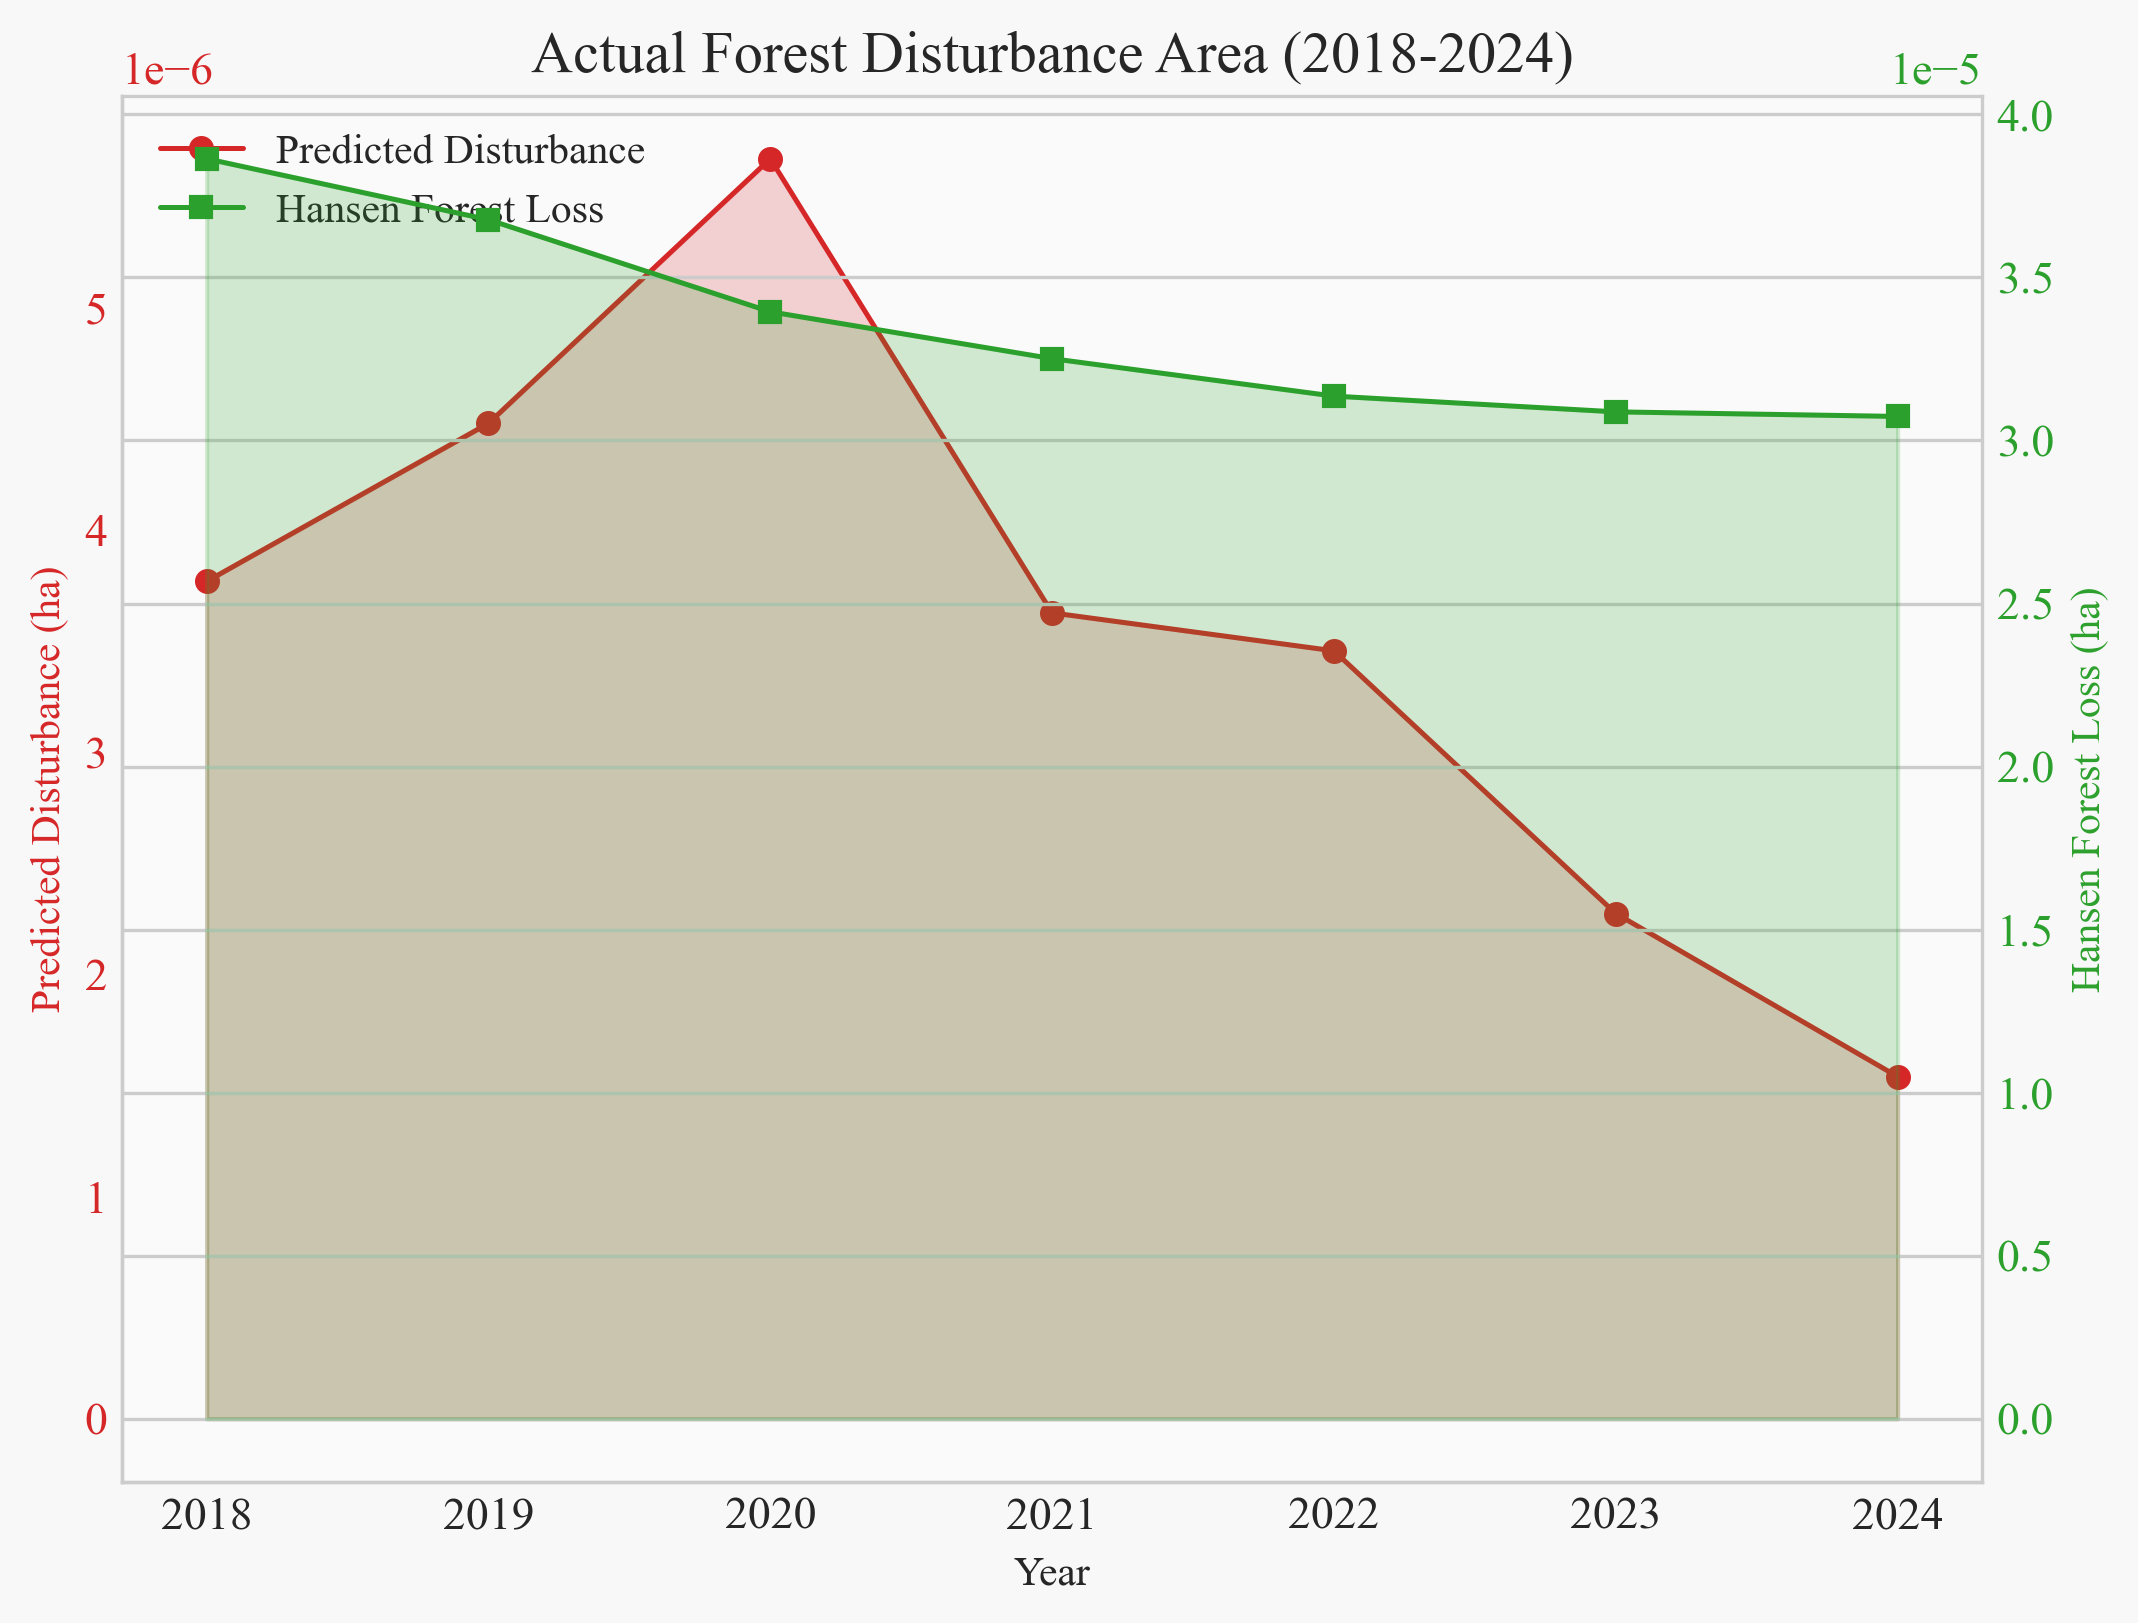

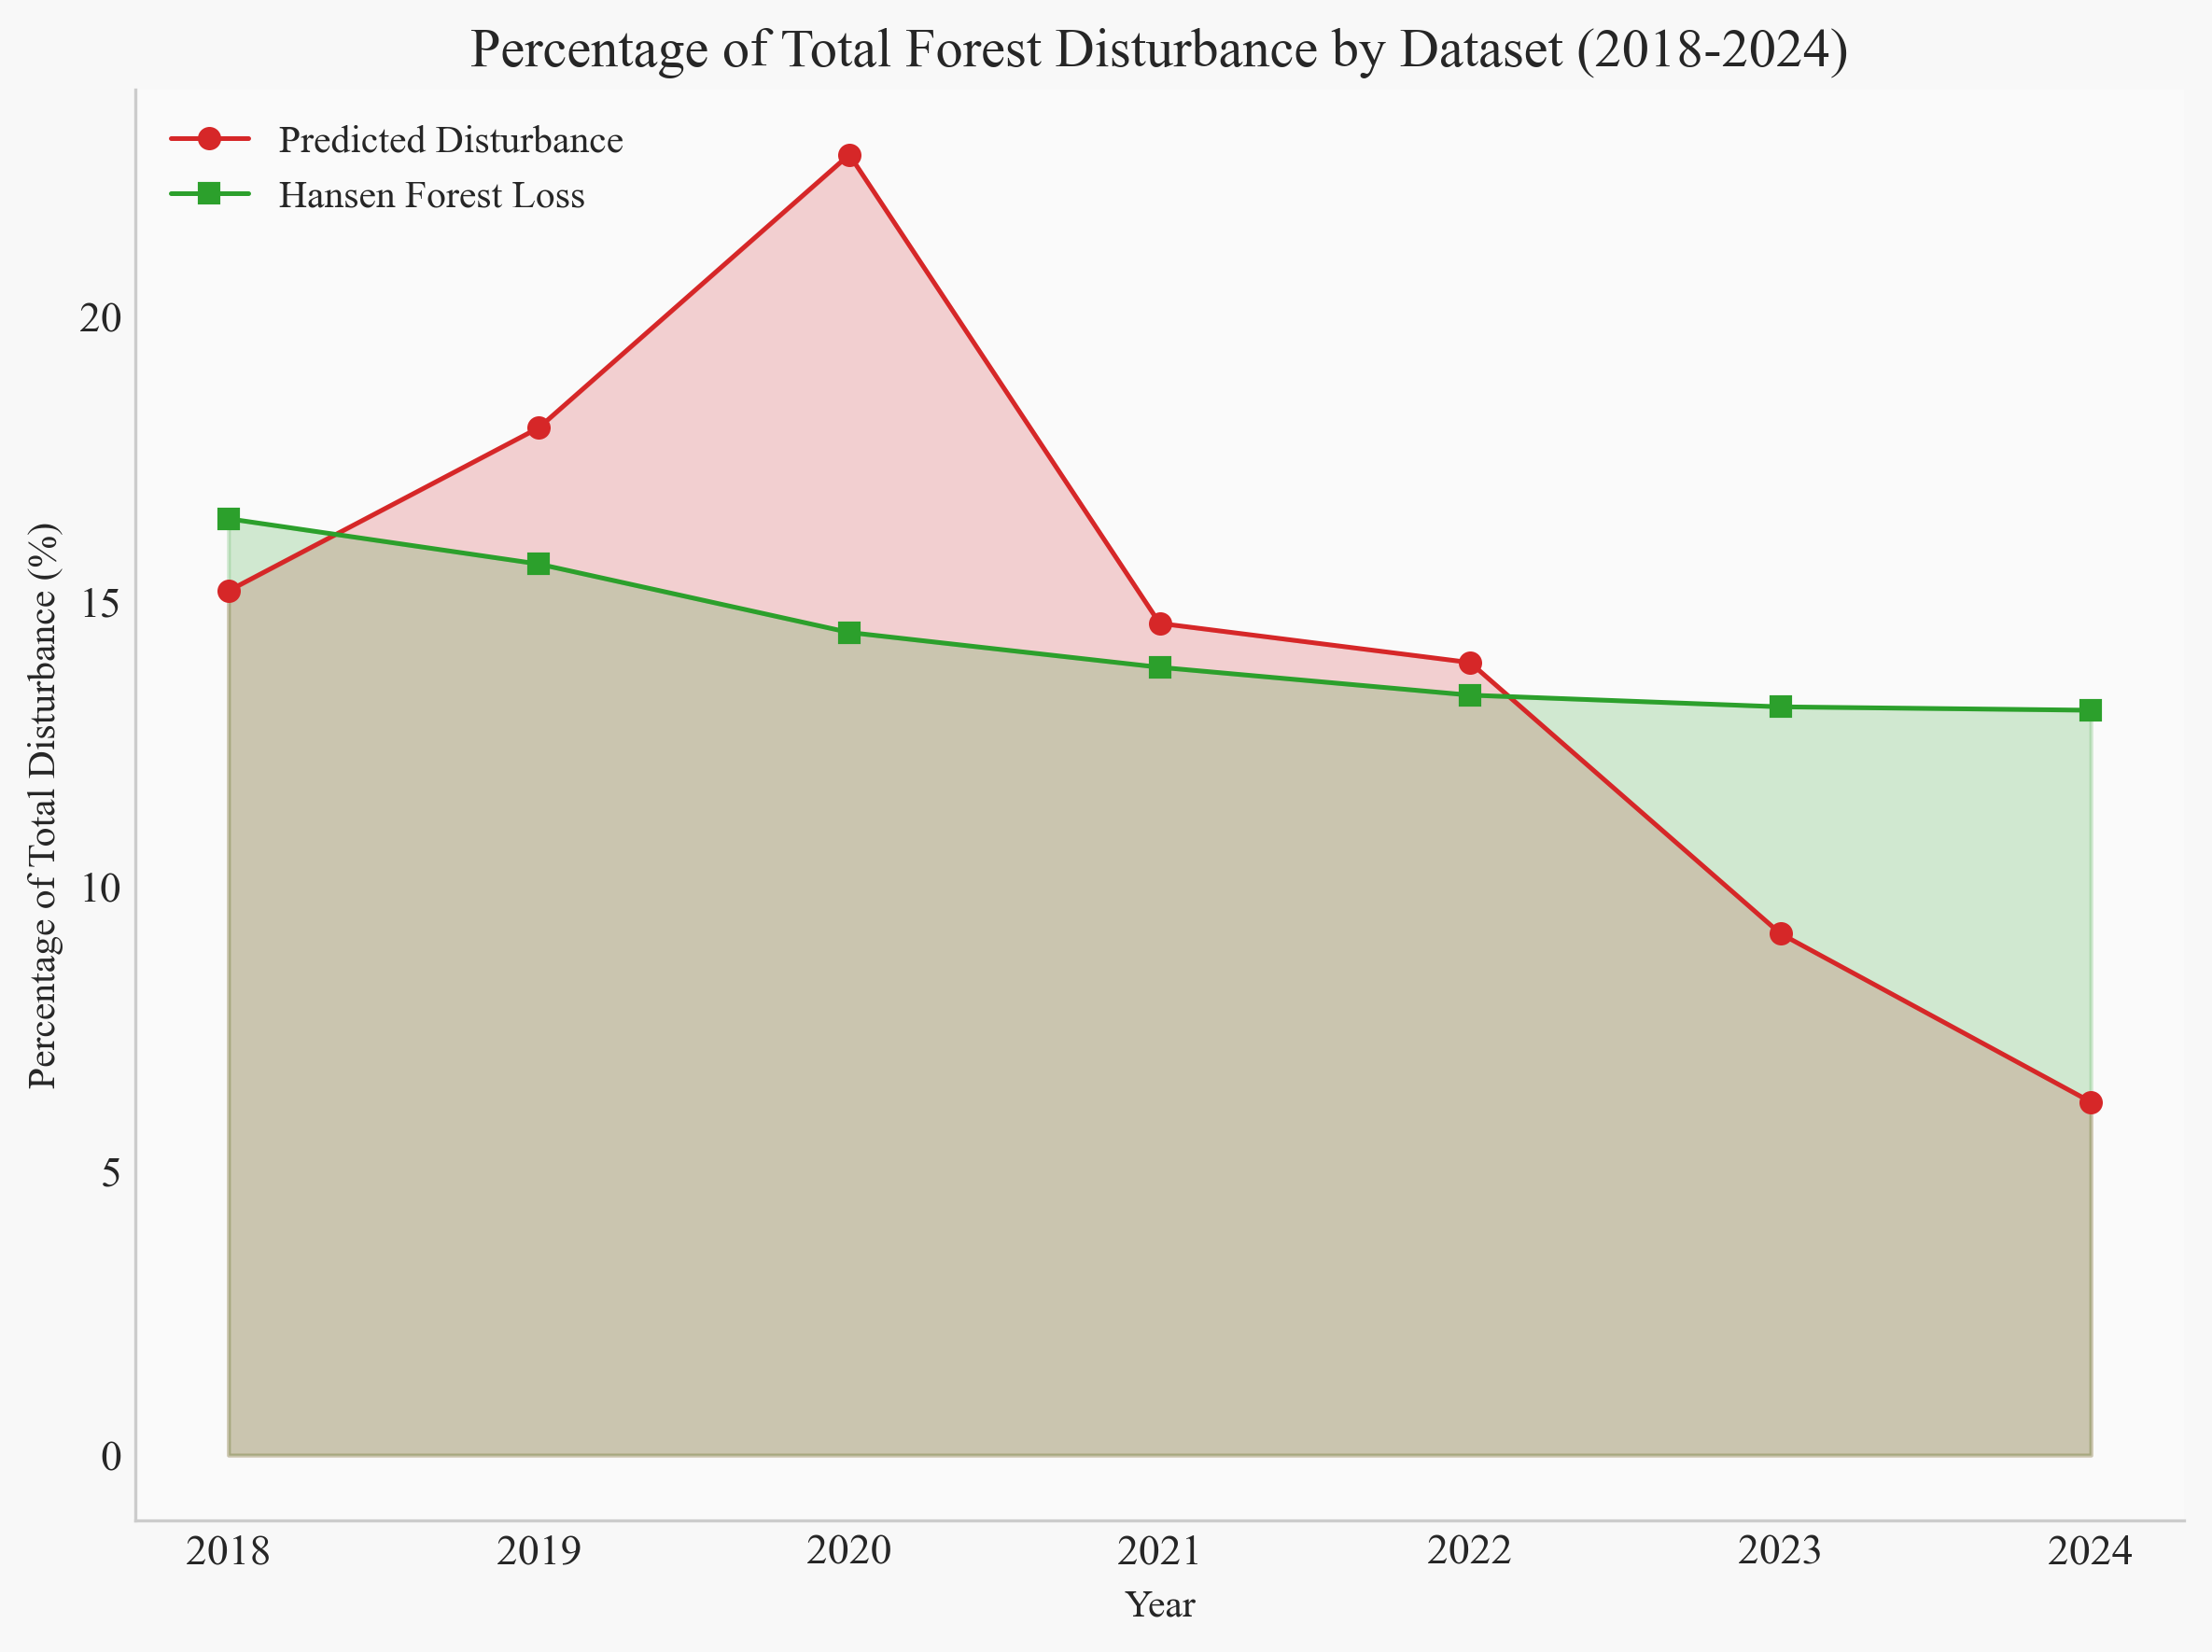

   Year  Disturbed Area (User) ha  Disturbed Area (Forest) ha  \
0  2018                  0.000004                    0.000039   
1  2019                  0.000004                    0.000037   
2  2020                  0.000006                    0.000034   
3  2021                  0.000004                    0.000033   
4  2022                  0.000003                    0.000031   
5  2023                  0.000002                    0.000031   
6  2024                  0.000002                    0.000031   

   Percentage User  Percentage Forest  
0        15.185790          16.453353  
1        18.052132          15.657397  
2        22.850930          14.455296  
3        14.615459          13.843059  
4        13.926789          13.353871  
5         9.162883          13.148387  
6         6.206017          13.088637  


In [4]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set publication-quality style
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.titlesize'] = 14

# Function to calculate disturbed area in hectares
def calculate_disturbed_area(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        disturbed_pixels = np.sum(data == 1)  # Count pixels with value 1
        
        # Get pixel dimensions from the transform
        transform = src.transform
        pixel_width = abs(transform[0])
        pixel_height = abs(transform[4])
        
        # Calculate area per pixel (in square meters) and convert to hectares
        pixel_area_m2 = pixel_width * pixel_height
        disturbed_area_ha = (disturbed_pixels * pixel_area_m2) / 10000
        
    return disturbed_area_ha

# Placeholder paths to your rasters (update these with your actual file paths)
disturbance_rasters = {
    "2018": "predicted_2018.tif",
    "2019": "predicted_2019.tif",
    "2020": "predicted_2020.tif",
    "2021": "predicted_2021.tif",
    "2022": "predicted_2022.tif",
    "2023": "predicted_2023.tif",
    "2024": "predicted_2024.tif"
}

hansen_rasters = {
    "2018": "forest_2018_4.tif",
    "2019": "forest_2019_4.tif",
    "2020": "forest_2020_4.tif",
    "2021": "forest_2021_4.tif",
    "2022": "forest_2022_4.tif",
    "2023": "forest_2023_4.tif",
    "2024": "forest_2024_4.tif"
}

# Calculate disturbed areas for both datasets
results = []
for year in disturbance_rasters.keys():
    area_user = calculate_disturbed_area(disturbance_rasters[year])
    area_hansen = calculate_disturbed_area(hansen_rasters[year])
    results.append({
        "Year": year,
        "Disturbed Area (User) ha": area_user,
        "Disturbed Area (Forest) ha": area_hansen
    })

# Convert to DataFrame and set Year as integer
results_df = pd.DataFrame(results)
results_df["Year"] = results_df["Year"].astype(int)

# Calculate total disturbed area for each dataset
total_user = results_df["Disturbed Area (User) ha"].sum()
total_hansen = results_df["Disturbed Area (Forest) ha"].sum()

# Calculate percentage of total for each dataset
results_df["Percentage User"] = (results_df["Disturbed Area (User) ha"] / total_user) * 100
results_df["Percentage Forest"] = (results_df["Disturbed Area (Forest) ha"] / total_hansen) * 100

# Define colors
user_color = '#D62728'  # Red for predicted disturbance
hansen_color = '#2CA02C'  # Green for Hansen forest loss

# **Graph 1: Actual Disturbed Area**
fig1, ax1 = plt.subplots(figsize=(8, 6), dpi=300)

# Predicted disturbance (left y-axis)
ax1.fill_between(results_df["Year"], 0, results_df["Disturbed Area (User) ha"], 
                 alpha=0.2, color=user_color)
ax1.plot(results_df["Year"], results_df["Disturbed Area (User) ha"], 
         label="Predicted Disturbance", marker='o', color=user_color, 
         linewidth=1.2, markersize=5)
ax1.set_ylabel("Predicted Disturbance (ha)", color=user_color)
ax1.tick_params(axis='y', colors=user_color)

# Hansen forest loss (right y-axis)
ax2 = ax1.twinx()
ax2.fill_between(results_df["Year"], 0, results_df["Disturbed Area (Forest) ha"], 
                 alpha=0.2, color=hansen_color)
ax2.plot(results_df["Year"], results_df["Disturbed Area (Forest) ha"], 
         label="Hansen Forest Loss", marker='s', color=hansen_color, 
         linewidth=1.2, markersize=5)
ax2.set_ylabel("Hansen Forest Loss (ha)", color=hansen_color)
ax2.tick_params(axis='y', colors=hansen_color)

# X-axis and title
ax1.set_xlabel("Year")
ax1.set_title("Actual Forest Disturbance Area (2018-2024)")

# Remove grid and adjust spines
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='upper left')

# Set integer ticks on x-axis
ax1.set_xticks(results_df["Year"])

# Background colors
fig1.patch.set_facecolor('#F8F8F8')
ax1.set_facecolor('#FAFAFA')

# **Graph 2: Percentage of Total for Each Dataset**
fig2, ax3 = plt.subplots(figsize=(8, 6), dpi=300)

# Predicted disturbance percentage
ax3.fill_between(results_df["Year"], 0, results_df["Percentage User"], 
                 alpha=0.2, color=user_color)
ax3.plot(results_df["Year"], results_df["Percentage User"], 
         label="Predicted Disturbance", marker='o', color=user_color, 
         linewidth=1.2, markersize=5)

# Hansen forest loss percentage
ax3.fill_between(results_df["Year"], 0, results_df["Percentage Forest"], 
                 alpha=0.2, color=hansen_color)
ax3.plot(results_df["Year"], results_df["Percentage Forest"], 
         label="Hansen Forest Loss", marker='s', color=hansen_color, 
         linewidth=1.2, markersize=5)

# Labels and title
ax3.set_xlabel("Year")
ax3.set_ylabel("Percentage of Total Disturbance (%)")
ax3.set_title("Percentage of Total Forest Disturbance by Dataset (2018-2024)")

# Remove grid and adjust spines
ax3.grid(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Legend
ax3.legend(frameon=False, loc='upper left')

# Set integer ticks on x-axis
ax3.set_xticks(results_df["Year"])

# Background colors
fig2.patch.set_facecolor('#F8F8F8')
ax3.set_facecolor('#FAFAFA')

# Save the plots
fig1.savefig("actual_disturbance_area.pdf", bbox_inches='tight', dpi=300)
fig2.savefig("percentage_disturbance_each.pdf", bbox_inches='tight', dpi=300)

# Display the plots
plt.tight_layout()
plt.show()

# Print results for verification
print(results_df[["Year", "Disturbed Area (User) ha", "Disturbed Area (Forest) ha", 
                  "Percentage User", "Percentage Forest"]])

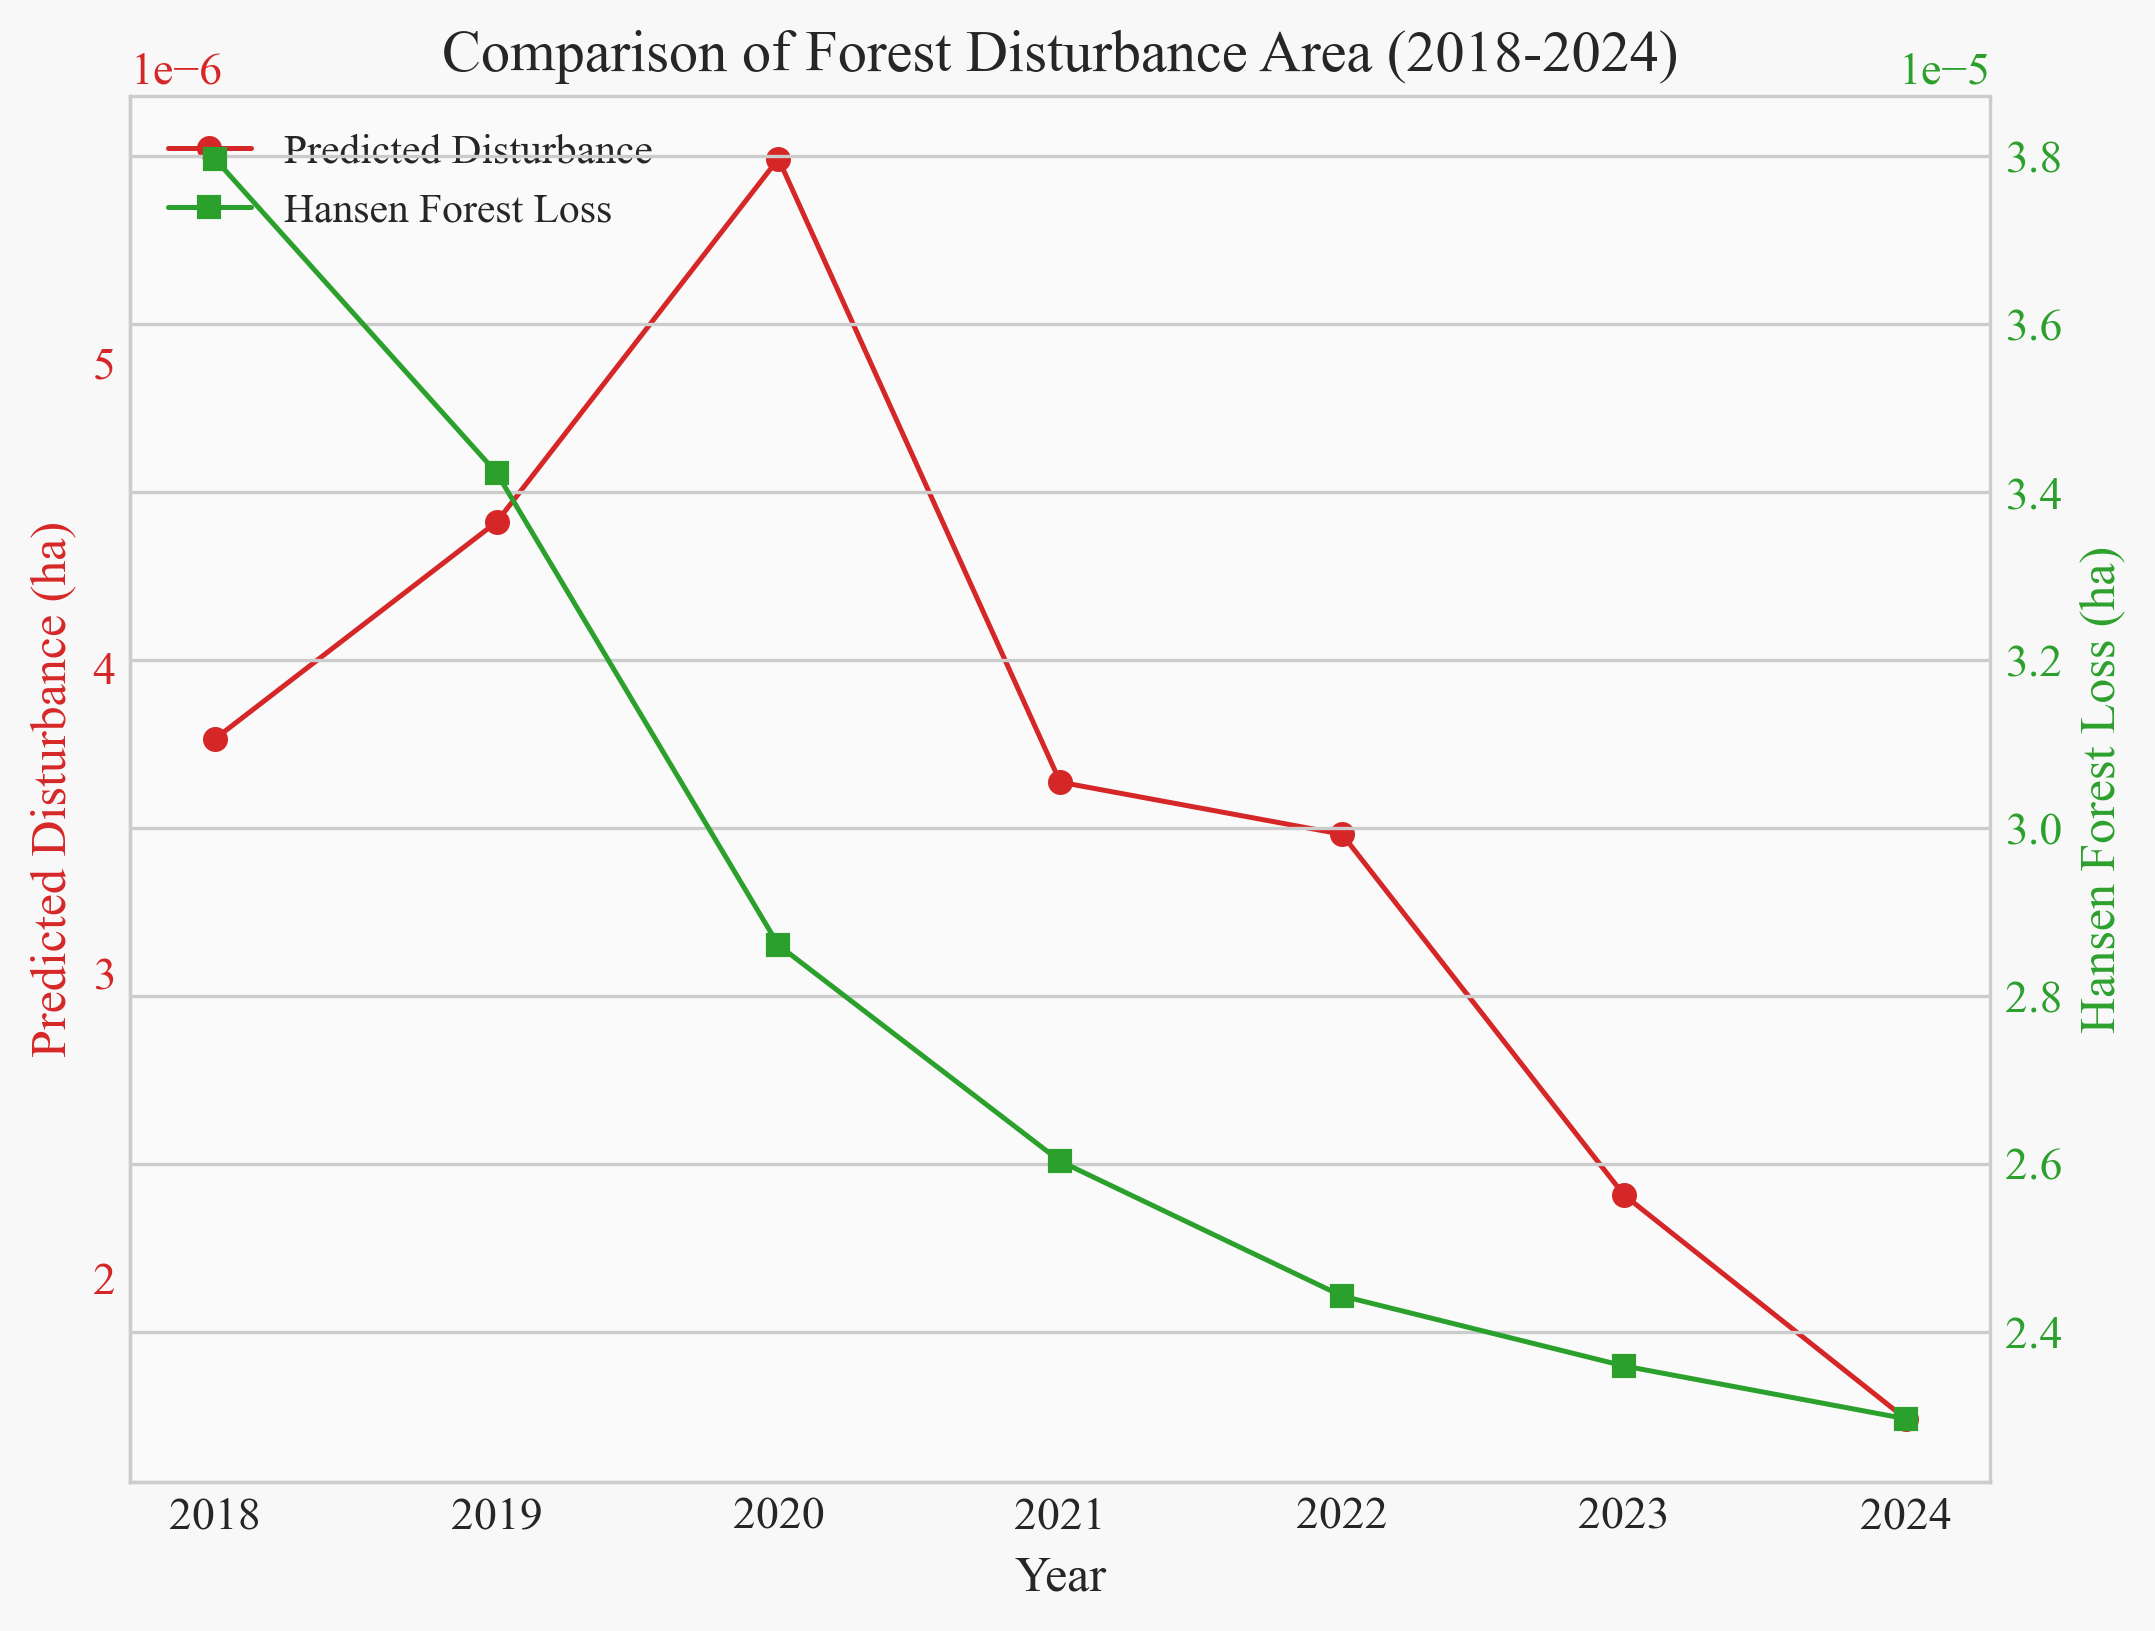

   Year  Disturbed Area (User) ha  Disturbed Area (Forest) ha
0  2018                  0.000004                    0.000038
1  2019                  0.000004                    0.000034
2  2020                  0.000006                    0.000029
3  2021                  0.000004                    0.000026
4  2022                  0.000003                    0.000024
5  2023                  0.000002                    0.000024
6  2024                  0.000002                    0.000023


In [2]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

# Use a clean, publication-quality style
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.titlesize'] = 14

# Function to calculate the actual area of pixels with value 1
def calculate_disturbed_area(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        disturbed_pixels = np.sum(data == 1)  # Count pixels with value 1
        
        # Get pixel dimensions from the transform
        transform = src.transform
        pixel_width = abs(transform[0])
        pixel_height = abs(transform[4])
        
        # Calculate area per pixel (in square meters)
        pixel_area_m2 = pixel_width * pixel_height
        
        # Calculate total area (convert to hectares)
        disturbed_area_ha = (disturbed_pixels * pixel_area_m2) / 10000
        
    return disturbed_area_ha

# Paths to your disturbance raster files and Hansen dataset rasters
disturbance_rasters = {
    "2018": "predicted_2018.tif",
    "2019": "predicted_2019.tif",
    "2020": "predicted_2020.tif",
    "2021": "predicted_2021.tif",
    "2022": "predicted_2022.tif",
    "2023": "predicted_2023.tif",
    "2024": "predicted_2024.tif"
}

hansen_rasters = {
    "2018": "forest_2018_5.tif",
    "2019": "forest_2019_5.tif",
    "2020": "forest_2020_5.tif",
    "2021": "forest_2021_5.tif",
    "2022": "forest_2022_5.tif",
    "2023": "forest_2023_5.tif",
    "2024": "forest_2024_5.tif"
}

# Calculate actual disturbed areas for both datasets
results = []
for year in disturbance_rasters.keys():
    area_user = calculate_disturbed_area(disturbance_rasters[year])
    area_hansen = calculate_disturbed_area(hansen_rasters[year])
    results.append({
        "Year": year,
        "Disturbed Area (User) ha": area_user,
        "Disturbed Area (Forest) ha": area_hansen
    })

# Convert results to a DataFrame and convert Year to integer
results_df = pd.DataFrame(results)
results_df["Year"] = results_df["Year"].astype(int)

# Colors for the plots
user_color = '#D62728'  # red for disturbed forest
hansen_color = '#2CA02C'  # green for Hansen

# Create a single plot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=300)

# Plot predicted disturbance on the left y-axis
ax1.plot(results_df["Year"], results_df["Disturbed Area (User) ha"],
         label="Predicted Disturbance", marker='o', color=user_color,
         linewidth=1.2, markersize=5)
ax1.set_ylabel("Predicted Disturbance (ha)", color=user_color)
ax1.tick_params(axis='y', colors=user_color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot Hansen forest loss on the right y-axis
ax2.plot(results_df["Year"], results_df["Disturbed Area (Forest) ha"],
         label="Hansen Forest Loss", marker='s', color=hansen_color,
         linewidth=1.2, markersize=5)
ax2.set_ylabel("Hansen Forest Loss (ha)", color=hansen_color)
ax2.tick_params(axis='y', colors=hansen_color)

# Set x-axis label and title
ax1.set_xlabel("Year")
ax1.set_title("Comparison of Forest Disturbance Area (2018-2024)")

# Adjust spines for a clean look
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='upper left')

# Ensure x-axis ticks are at integer years
ax1.set_xticks(results_df["Year"])

# Add subtle background colors
fig.patch.set_facecolor('#F8F8F8')
ax1.set_facecolor('#FAFAFA')

# Save the plot as a PDF
fig.savefig("forest_disturbance_comparison2.pdf", bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Print the results table (optional, showing only actual areas)
print(results_df[["Year", "Disturbed Area (User) ha", "Disturbed Area (Forest) ha"]])

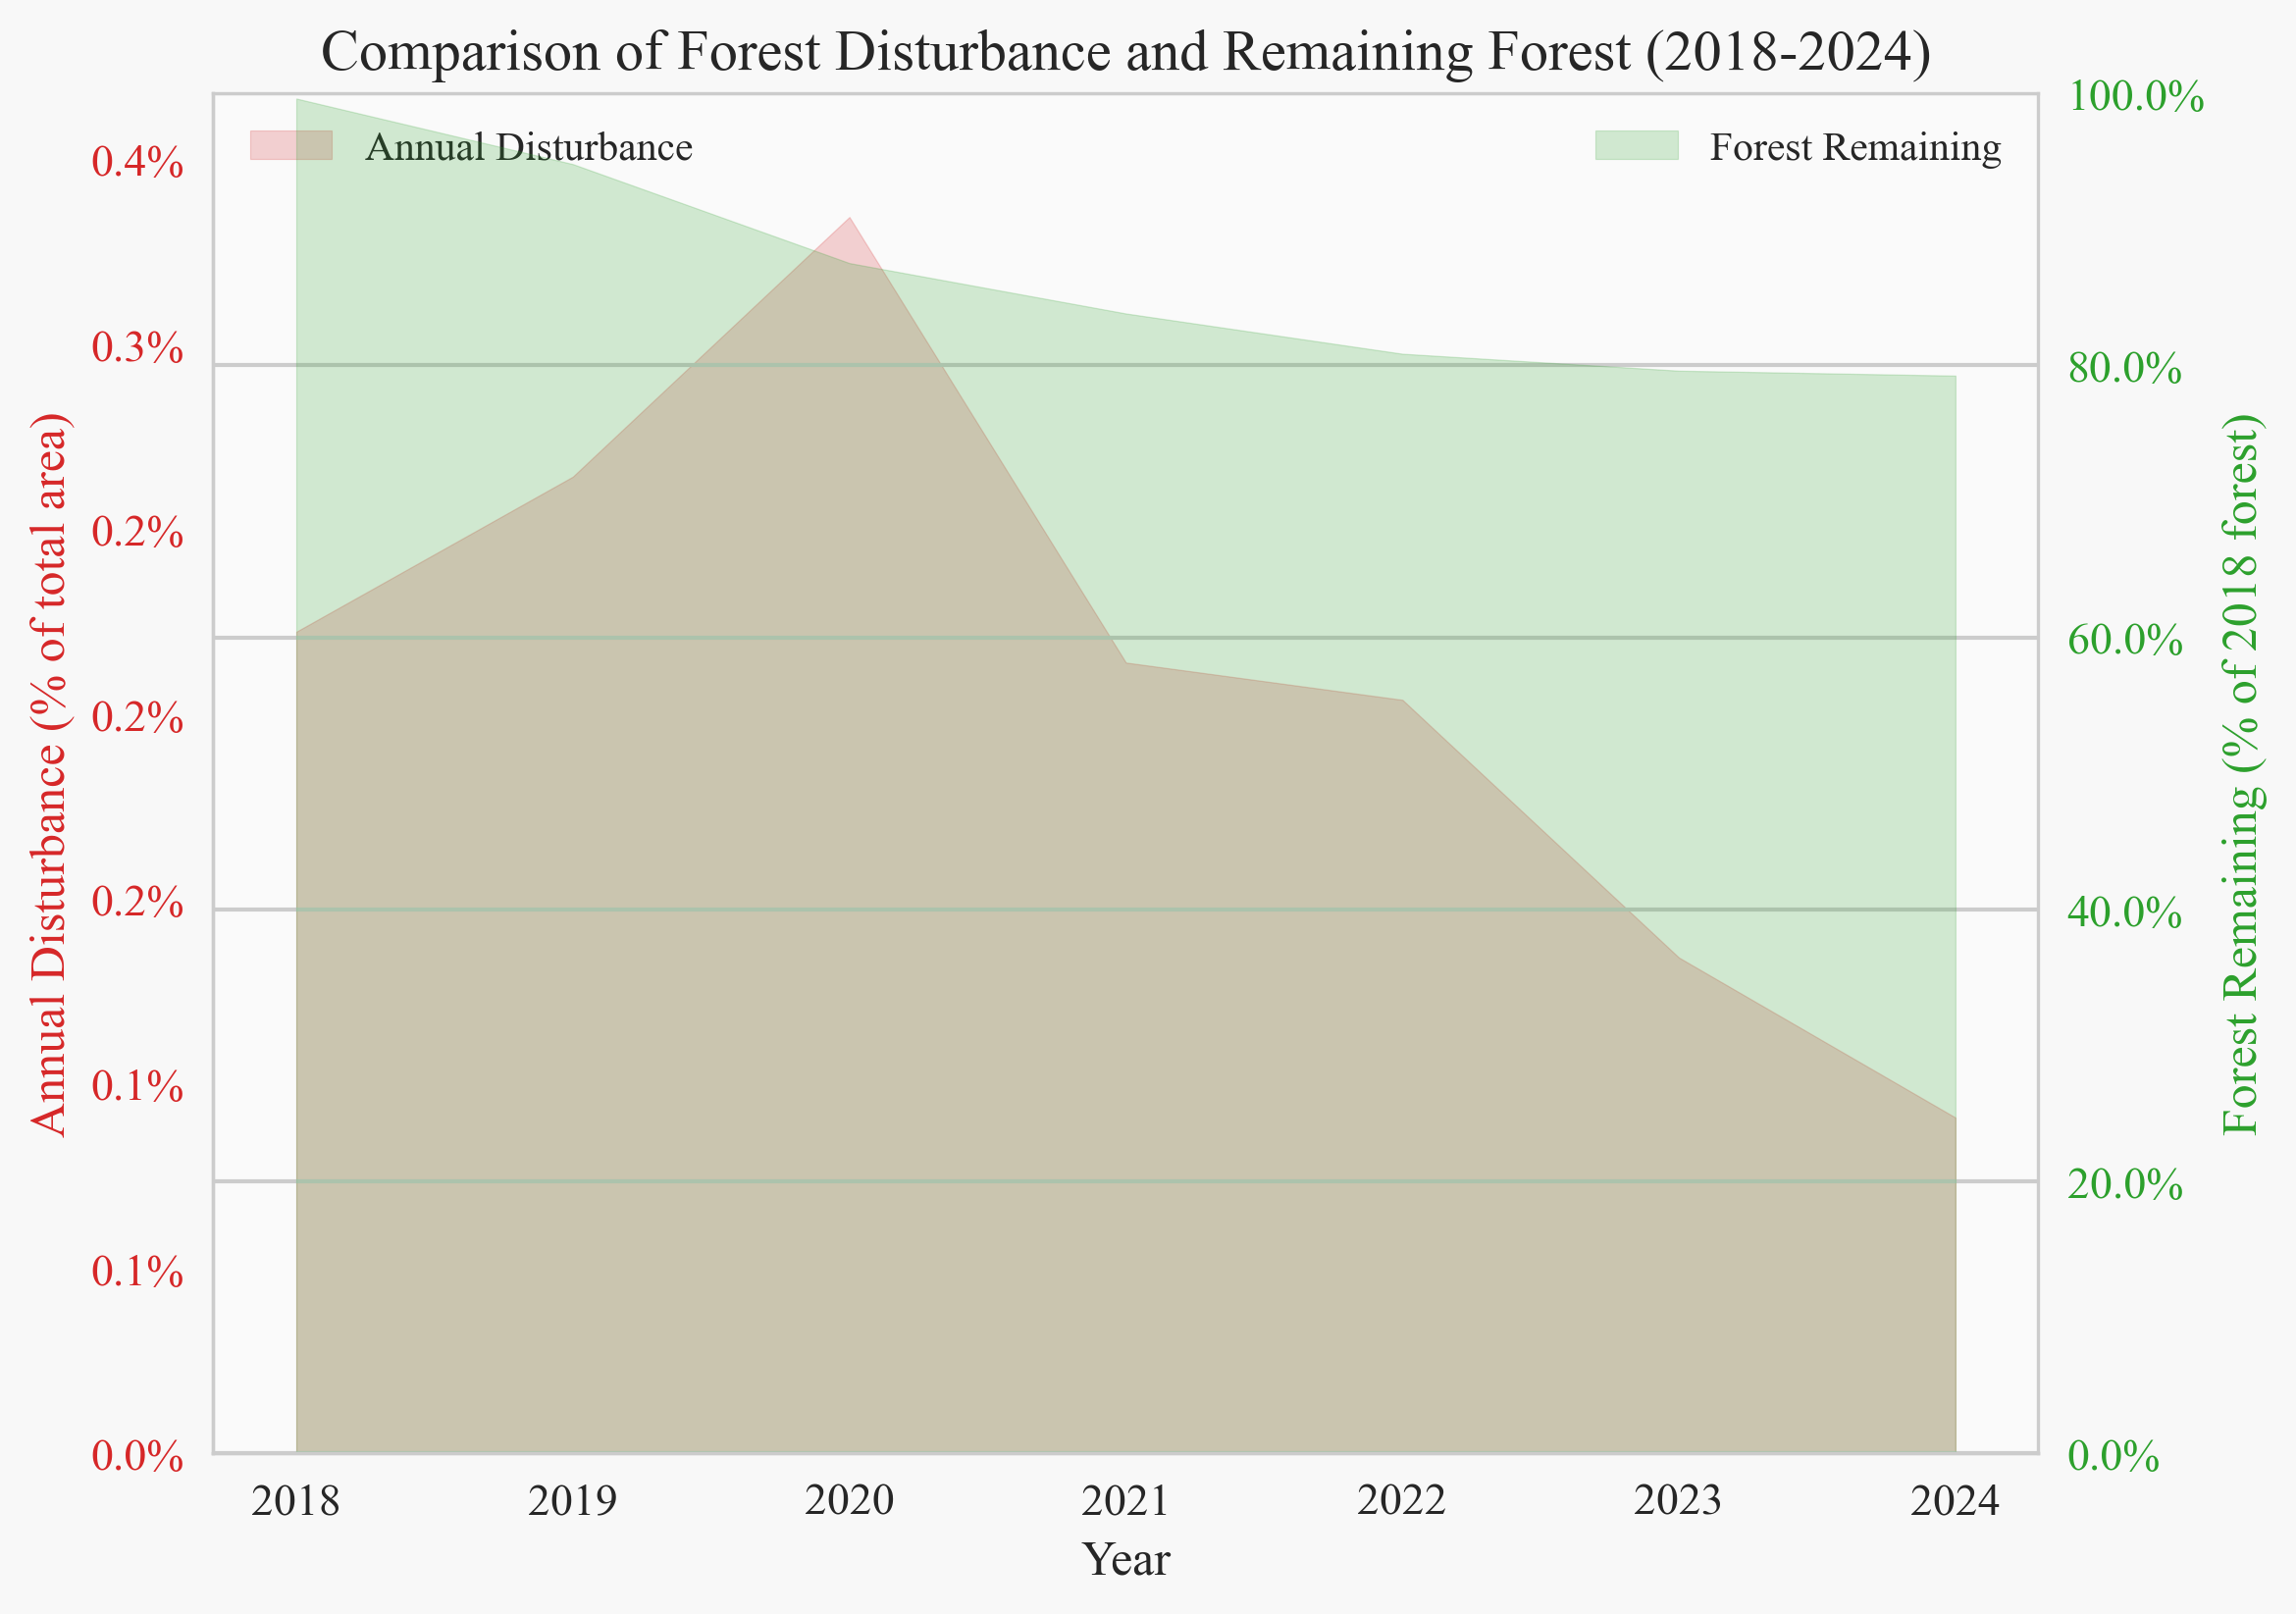

   Year  Predicted Disturbance (%)  Forest Remaining (%)
0  2018                   0.222258             99.619196
1  2019                   0.264209             94.799968
2  2020                   0.334444             87.521673
3  2021                   0.213910             83.814793
4  2022                   0.203831             80.852934
5  2023                   0.134107             79.608804
6  2024                   0.090831             79.247036


In [17]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

# Set up a clean, publication-quality style
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.titlesize'] = 14

# Function to calculate the area of pixels with a specific value (e.g., 1 for disturbance or forest)
def calculate_area_with_value(raster_path, value=1):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        pixels = np.sum(data == value)  # Count pixels with the specified value
        transform = src.transform
        pixel_width = abs(transform[0])
        pixel_height = abs(transform[4])
        pixel_area_m2 = pixel_width * pixel_height
        area_ha = (pixels * pixel_area_m2) / 10000  # Convert to hectares
    return area_ha

# Function to calculate the total area of the raster (all pixels)
def calculate_total_area(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)
        total_pixels = data.size  # Total number of pixels
        transform = src.transform
        pixel_width = abs(transform[0])
        pixel_height = abs(transform[4])
        pixel_area_m2 = pixel_width * pixel_height
        total_area_ha = (total_pixels * pixel_area_m2) / 10000  # Convert to hectares
    return total_area_ha

# Paths to disturbance and Hansen forest raster files
disturbance_rasters = {
    "2018": "predicted_2018.tif",
    "2019": "predicted_2019.tif",
    "2020": "predicted_2020.tif",
    "2021": "predicted_2021.tif",
    "2022": "predicted_2022.tif",
    "2023": "predicted_2023.tif",
    "2024": "predicted_2024.tif"
}

Forest_2017 = {"2017": "forest_2017_5.tif"}

hansen_rasters = {
    "2018": "forest_2018_4.tif",
    "2019": "forest_2019_4.tif",
    "2020": "forest_2020_4.tif",
    "2021": "forest_2021_4.tif",
    "2022": "forest_2022_4.tif",
    "2023": "forest_2023_4.tif",
    "2024": "forest_2024_4.tif"
}

# Calculate total area from the 2018 disturbance raster (assumed constant across years)
total_area = calculate_total_area(disturbance_rasters["2018"])

# Calculate forest area in 2018 from Hansen raster (baseline for 100%)
forest_area_2018 = calculate_area_with_value(Forest_2017["2017"], value=1)

# Calculate percentages for each year
results = []
for year in disturbance_rasters.keys():
    # Predicted disturbance: area where value=1
    disturbed_area = calculate_area_with_value(disturbance_rasters[year], value=1)
    predicted_percentage = (disturbed_area / total_area) * 100

    # Hansen forest: forest area where value=1
    forest_area = calculate_area_with_value(hansen_rasters[year], value=1)
    forest_left_percentage = (forest_area / forest_area_2018) * 100

    results.append({
        "Year": int(year),
        "Predicted Disturbance (%)": predicted_percentage,
        "Forest Remaining (%)": forest_left_percentage
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Colors for the plots
user_color = '#D62728'  # Red for predicted disturbance
hansen_color = '#2CA02C'  # Green for Hansen forest remaining

# Create a single plot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=300)

# Calculate the maximum predicted disturbance percentage
max_disturbance = results_df["Predicted Disturbance (%)"].max()

# Plot transparent shaded area for predicted disturbance percentage on the left y-axis
ax1.fill_between(results_df["Year"], results_df["Predicted Disturbance (%)"], color=user_color, alpha=0.2)
ax1.set_xlabel("Year")
ax1.set_ylabel("Annual Disturbance (% of total area)", color=user_color)
ax1.tick_params(axis='y', colors=user_color)
ax1.set_ylim(0, max_disturbance * 1.1)  # Scale the left y-axis with 10% headroom

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot transparent shaded area for forest remaining percentage on the right y-axis
ax2.fill_between(results_df["Year"], results_df["Forest Remaining (%)"], color=hansen_color, alpha=0.2)
ax2.set_ylabel("Forest Remaining (% of 2018 forest)", color=hansen_color)
ax2.tick_params(axis='y', colors=hansen_color)
ax2.set_ylim(0, 100)  # Keep the right y-axis at 0-100%

# Format y-axis labels to show percentages with one decimal place
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

# Set title and adjust aesthetics
ax1.set_title("Comparison of Forest Disturbance and Remaining Forest (2018-2024)")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)

# Add legends for the shaded areas
ax1.legend([mpl.patches.Patch(color=user_color, alpha=0.2)], ["Annual Disturbance"], frameon=False, loc='upper left')
ax2.legend([mpl.patches.Patch(color=hansen_color, alpha=0.2)], ["Forest Remaining"], frameon=False, loc='upper right')

# Ensure x-axis ticks are at integer years
ax1.set_xticks(results_df["Year"])

# Add subtle background colors
fig.patch.set_facecolor('#F8F8F8')
ax1.set_facecolor('#FAFAFA')

# Save the plot as a PDF
fig.savefig("forest_disturbance_percentages_shaded.pdf", bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Print the results table
print(results_df[["Year", "Predicted Disturbance (%)", "Forest Remaining (%)"]])

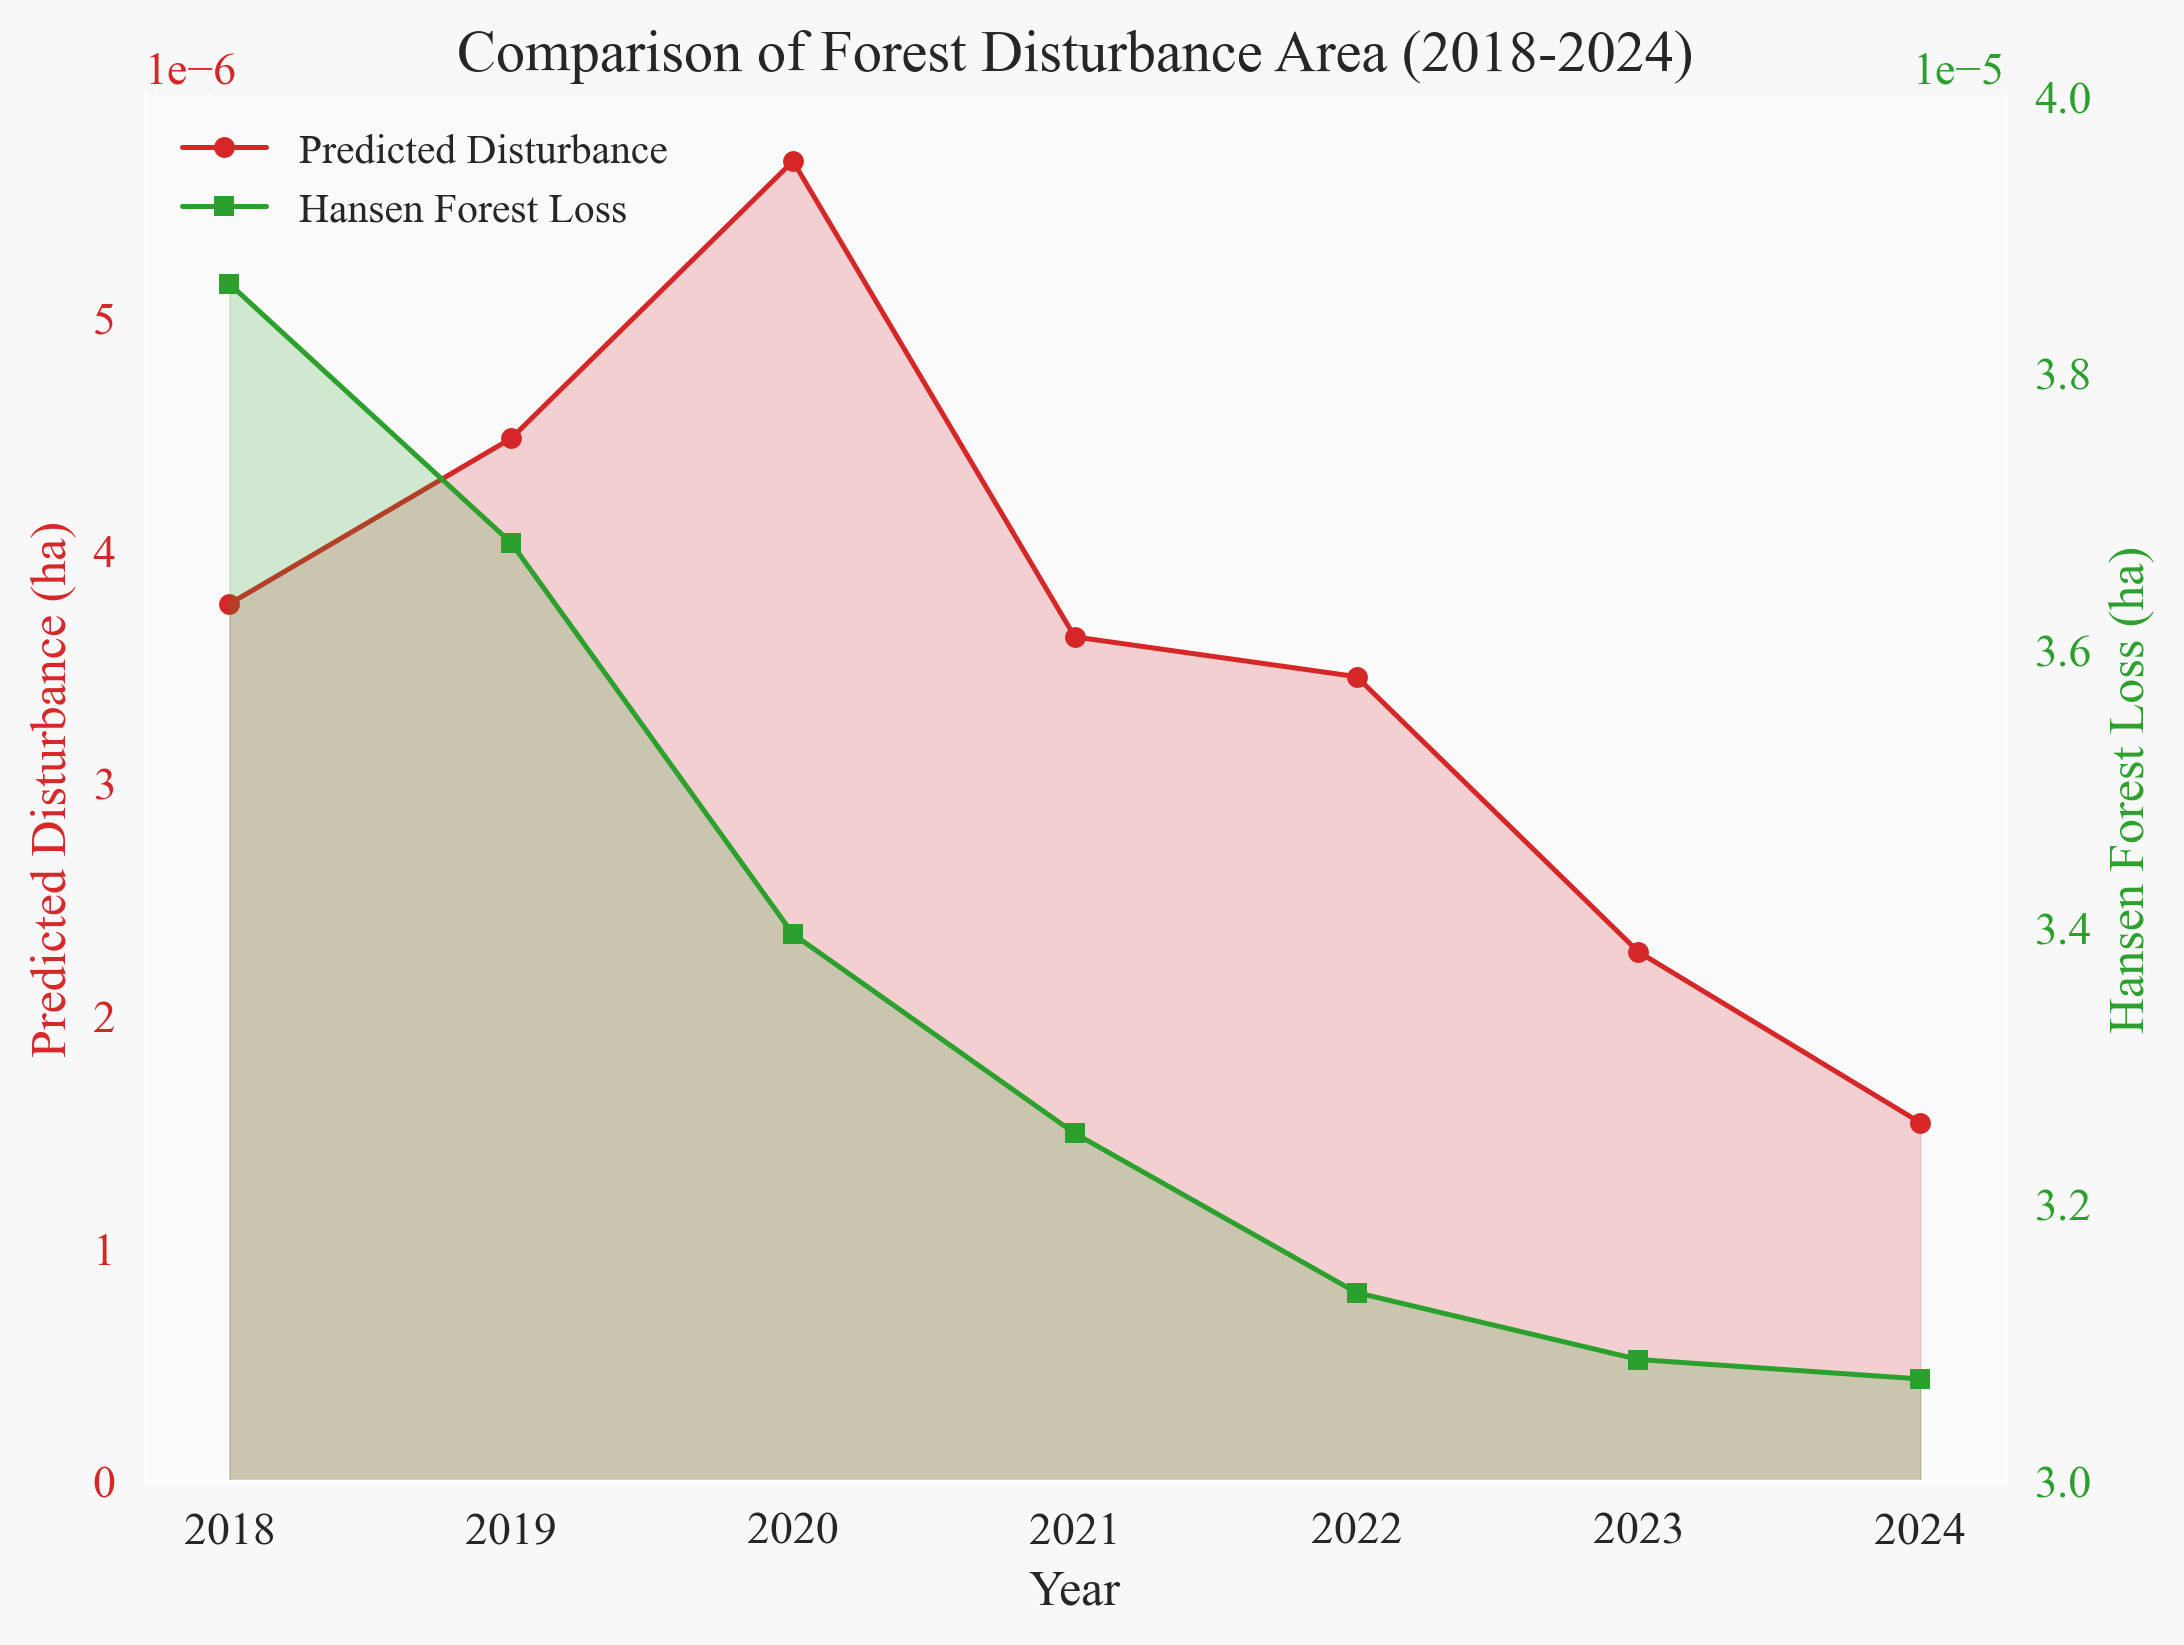

   Year  Disturbed Area (User) ha  Disturbed Area (Forest) ha
0  2018                  0.000004                    0.000039
1  2019                  0.000004                    0.000037
2  2020                  0.000006                    0.000034
3  2021                  0.000004                    0.000033
4  2022                  0.000003                    0.000031
5  2023                  0.000002                    0.000031
6  2024                  0.000002                    0.000031


In [20]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

# Use a clean style without grid
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.grid'] = False  # Explicitly turn off grid

# Function to calculate the actual area of pixels with value 1
def calculate_disturbed_area(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        disturbed_pixels = np.sum(data == 1)  # Count pixels with value 1
        
        # Get pixel dimensions from the transform
        transform = src.transform
        pixel_width = abs(transform[0])
        pixel_height = abs(transform[4])
        
        # Calculate area per pixel (in square meters)
        pixel_area_m2 = pixel_width * pixel_height
        
        # Calculate total area (convert to hectares)
        disturbed_area_ha = (disturbed_pixels * pixel_area_m2) / 10000
        
    return disturbed_area_ha

# Paths to your disturbance raster files and Hansen dataset rasters
disturbance_rasters = {
    "2018": "predicted_2018.tif",
    "2019": "predicted_2019.tif",
    "2020": "predicted_2020.tif",
    "2021": "predicted_2021.tif",
    "2022": "predicted_2022.tif",
    "2023": "predicted_2023.tif",
    "2024": "predicted_2024.tif"
}

hansen_rasters = {
    "2018": "forest_2018_4.tif",
    "2019": "forest_2019_4.tif",
    "2020": "forest_2020_4.tif",
    "2021": "forest_2021_4.tif",
    "2022": "forest_2022_4.tif",
    "2023": "forest_2023_4.tif",
    "2024": "forest_2024_4.tif"
}

# Calculate actual disturbed areas for both datasets
results = []
for year in disturbance_rasters.keys():
    area_user = calculate_disturbed_area(disturbance_rasters[year])
    area_hansen = calculate_disturbed_area(hansen_rasters[year])
    results.append({
        "Year": year,
        "Disturbed Area (User) ha": area_user,
        "Disturbed Area (Forest) ha": area_hansen
    })

# Convert results to a DataFrame and convert Year to integer
results_df = pd.DataFrame(results)
results_df["Year"] = results_df["Year"].astype(int)
results_df = results_df.sort_values("Year")  # Ensure data is sorted by year

# Colors for the plots
user_color = '#D62728'  # red for disturbed forest
hansen_color = '#2CA02C'  # green for Hansen

# Create a single plot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=300)

# Plot predicted disturbance on the left y-axis
ax1.plot(results_df["Year"], results_df["Disturbed Area (User) ha"],
         label="Predicted Disturbance", marker='o', color=user_color,
         linewidth=1.2, markersize=5)

# Get min values for both datasets to align the bottom of the shading
min_user = 0
min_hansen = 0.00003  # This appears to be the min value from the y-axis in the image

# Set y-limits for the first axis
ax1.set_ylim(min_user, max(results_df["Disturbed Area (User) ha"]) * 1.05)

# Add semi-transparent shading under the first line 
# Use min_user as the bottom value
ax1.fill_between(results_df["Year"], min_user, results_df["Disturbed Area (User) ha"], 
                 color=user_color, alpha=0.2)

ax1.set_ylabel("Predicted Disturbance (ha)", color=user_color)
ax1.tick_params(axis='y', colors=user_color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot Hansen forest loss on the right y-axis
ax2.plot(results_df["Year"], results_df["Disturbed Area (Forest) ha"],
         label="Hansen Forest Loss", marker='s', color=hansen_color,
         linewidth=1.2, markersize=5)

# Set y-limits for the Hansen Forest Loss axis (approximately 0.00003 to 0.00004 based on image)
max_hansen = 0.00004  # from the chart
ax2.set_ylim(min_hansen, max_hansen)

# Add semi-transparent shading under the second line
# Use min_hansen as the bottom value
ax2.fill_between(results_df["Year"], min_hansen, results_df["Disturbed Area (Forest) ha"], 
                 color=hansen_color, alpha=0.2)

ax2.set_ylabel("Hansen Forest Loss (ha)", color=hansen_color)
ax2.tick_params(axis='y', colors=hansen_color)

# Set x-axis label and title
ax1.set_xlabel("Year")
ax1.set_title("Comparison of Forest Disturbance Area (2018-2024)")

# Ensure all grids are turned off
ax1.grid(False)
ax2.grid(False)

# Adjust spines for a clean look
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='upper left')

# Ensure x-axis ticks are at integer years
ax1.set_xticks(results_df["Year"])

# Add subtle background colors
fig.patch.set_facecolor('#F8F8F8')
ax1.set_facecolor('#FAFAFA')

# Save the plot as a PDF
fig.savefig("forest_disturbance_comparison.pdf", bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Print the results table (optional, showing only actual areas)
print(results_df[["Year", "Disturbed Area (User) ha", "Disturbed Area (Forest) ha"]])

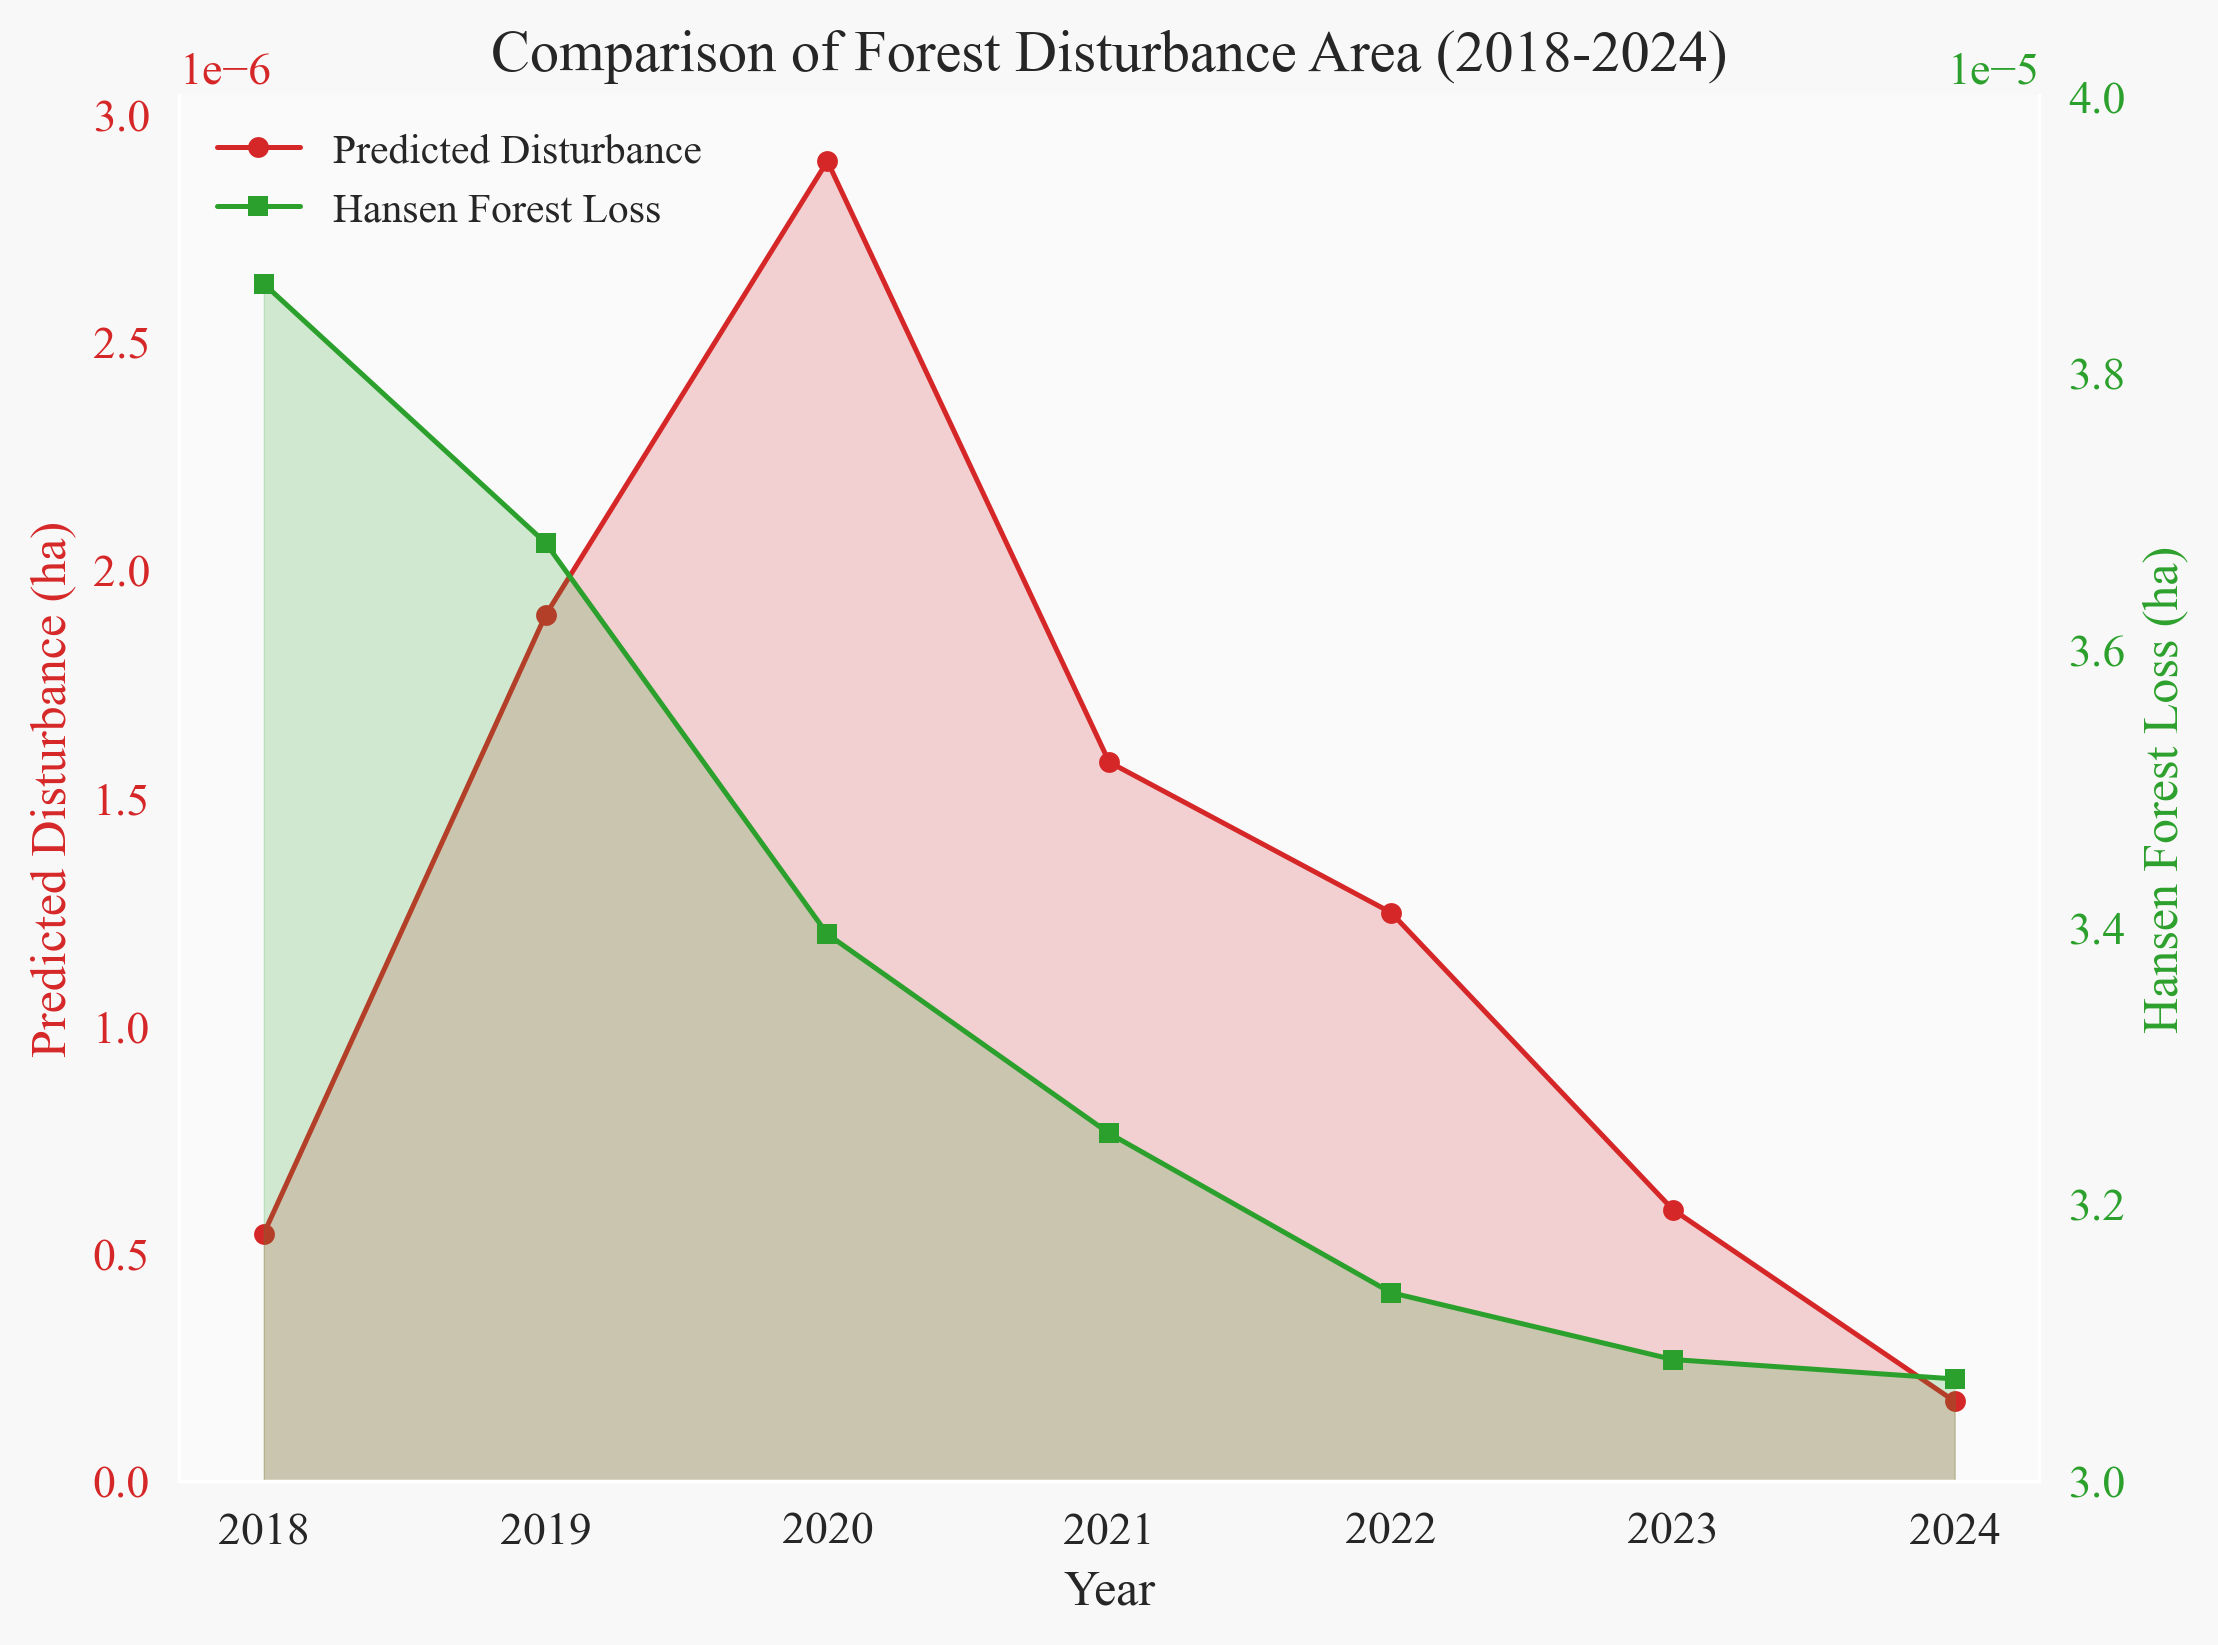

   Year  Disturbed Area (User) ha  Disturbed Area (Forest) ha
0  2018              5.429563e-07                    0.000039
1  2019              1.900589e-06                    0.000037
2  2020              2.896876e-06                    0.000034
3  2021              1.578075e-06                    0.000033
4  2022              1.247862e-06                    0.000031
5  2023              5.961025e-07                    0.000031
6  2024              1.751997e-07                    0.000031


In [22]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

# Use a clean style without grid
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.grid'] = False  # Explicitly turn off grid

# Function to calculate the actual area of pixels with value 1
def calculate_disturbed_area(raster_path):
    with rasterio.open(raster_path) as src:
        data = src.read(1)  # Read the first band
        disturbed_pixels = np.sum(data == 1)  # Count pixels with value 1
        
        # Get pixel dimensions from the transform
        transform = src.transform
        pixel_width = abs(transform[0])
        pixel_height = abs(transform[4])
        
        # Calculate area per pixel (in square meters)
        pixel_area_m2 = pixel_width * pixel_height
        
        # Calculate total area (convert to hectares)
        disturbed_area_ha = (disturbed_pixels * pixel_area_m2) / 10000
        
    return disturbed_area_ha

# Paths to your disturbance raster files and Hansen dataset rasters
disturbance_rasters = {
    "2018": "predicted_core_2018.tif",
    "2019": "predicted_core_2019.tif",
    "2020": "predicted_core_2020.tif",
    "2021": "predicted_core_2021.tif",
    "2022": "predicted_core_2022.tif",
    "2023": "predicted_core_2023.tif",
    "2024": "predicted_core_2024.tif"
}

hansen_rasters = {
    "2018": "forest_2018_4.tif",
    "2019": "forest_2019_4.tif",
    "2020": "forest_2020_4.tif",
    "2021": "forest_2021_4.tif",
    "2022": "forest_2022_4.tif",
    "2023": "forest_2023_4.tif",
    "2024": "forest_2024_4.tif"
}

# Calculate actual disturbed areas for both datasets
results = []
for year in disturbance_rasters.keys():
    area_user = calculate_disturbed_area(disturbance_rasters[year])
    area_hansen = calculate_disturbed_area(hansen_rasters[year])
    results.append({
        "Year": year,
        "Disturbed Area (User) ha": area_user,
        "Disturbed Area (Forest) ha": area_hansen
    })

# Convert results to a DataFrame and convert Year to integer
results_df = pd.DataFrame(results)
results_df["Year"] = results_df["Year"].astype(int)
results_df = results_df.sort_values("Year")  # Ensure data is sorted by year

# Colors for the plots
user_color = '#D62728'  # red for disturbed forest
hansen_color = '#2CA02C'  # green for Hansen

# Create a single plot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=300)

# Plot predicted disturbance on the left y-axis
ax1.plot(results_df["Year"], results_df["Disturbed Area (User) ha"],
         label="Predicted Disturbance", marker='o', color=user_color,
         linewidth=1.2, markersize=5)

# Get min values for both datasets to align the bottom of the shading
min_user = 0
min_hansen = 0.00003  # This appears to be the min value from the y-axis in the image

# Set y-limits for the first axis
ax1.set_ylim(min_user, max(results_df["Disturbed Area (User) ha"]) * 1.05)

# Add semi-transparent shading under the first line 
# Use min_user as the bottom value
ax1.fill_between(results_df["Year"], min_user, results_df["Disturbed Area (User) ha"], 
                 color=user_color, alpha=0.2)

ax1.set_ylabel("Predicted Disturbance (ha)", color=user_color)
ax1.tick_params(axis='y', colors=user_color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot Hansen forest loss on the right y-axis
ax2.plot(results_df["Year"], results_df["Disturbed Area (Forest) ha"],
         label="Hansen Forest Loss", marker='s', color=hansen_color,
         linewidth=1.2, markersize=5)

# Set y-limits for the Hansen Forest Loss axis (approximately 0.00003 to 0.00004 based on image)
max_hansen = 0.00004  # from the chart
ax2.set_ylim(min_hansen, max_hansen)

# Add semi-transparent shading under the second line
# Use min_hansen as the bottom value
ax2.fill_between(results_df["Year"], min_hansen, results_df["Disturbed Area (Forest) ha"], 
                 color=hansen_color, alpha=0.2)

ax2.set_ylabel("Hansen Forest Loss (ha)", color=hansen_color)
ax2.tick_params(axis='y', colors=hansen_color)

# Set x-axis label and title
ax1.set_xlabel("Year")
ax1.set_title("Comparison of Forest Disturbance Area (2018-2024)")

# Ensure all grids are turned off
ax1.grid(False)
ax2.grid(False)

# Adjust spines for a clean look
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='upper left')

# Ensure x-axis ticks are at integer years
ax1.set_xticks(results_df["Year"])

# Add subtle background colors
fig.patch.set_facecolor('#F8F8F8')
ax1.set_facecolor('#FAFAFA')

# Save the plot as a PDF
fig.savefig("forest_disturbance_comparison.pdf", bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Print the results table (optional, showing only actual areas)
print(results_df[["Year", "Disturbed Area (User) ha", "Disturbed Area (Forest) ha"]])

Checking raster consistency...

User disturbance rasters:
Inconsistent: ['predicted_core_2021.tif has different resolution: (8.983152841195218e-05, 8.983152841195218e-05) (expected (8.983152841195211e-05, 8.983152841195211e-05))']

Hansen forest loss rasters:
Consistent: All rasters have same CRS and resolution

Calculating areas...

--- Processing Year 2018 ---

User disturbance dataset:
Reprojecting predicted_core_2018.tif to EPSG:3857

File: predicted_core_2018.tif
CRS: EPSG:4326
Is projected: False
Reprojected to: EPSG:3857
Pixel dimensions: 10.93m x 10.93m
Pixel area: 119.36 m²
Disturbed pixels: 866352 (0.26% of total)
Total disturbed area: 103.41 km²

Hansen forest loss dataset:
Reprojecting forest_2018_4.tif to EPSG:3857

File: forest_2018_4.tif
CRS: EPSG:4326
Is projected: False
Reprojected to: EPSG:3857
Pixel dimensions: 10.93m x 10.93m
Pixel area: 119.36 m²
Disturbed pixels: 61677413 (18.54% of total)
Total disturbed area: 7361.92 km²

--- Processing Year 2019 ---

User distu

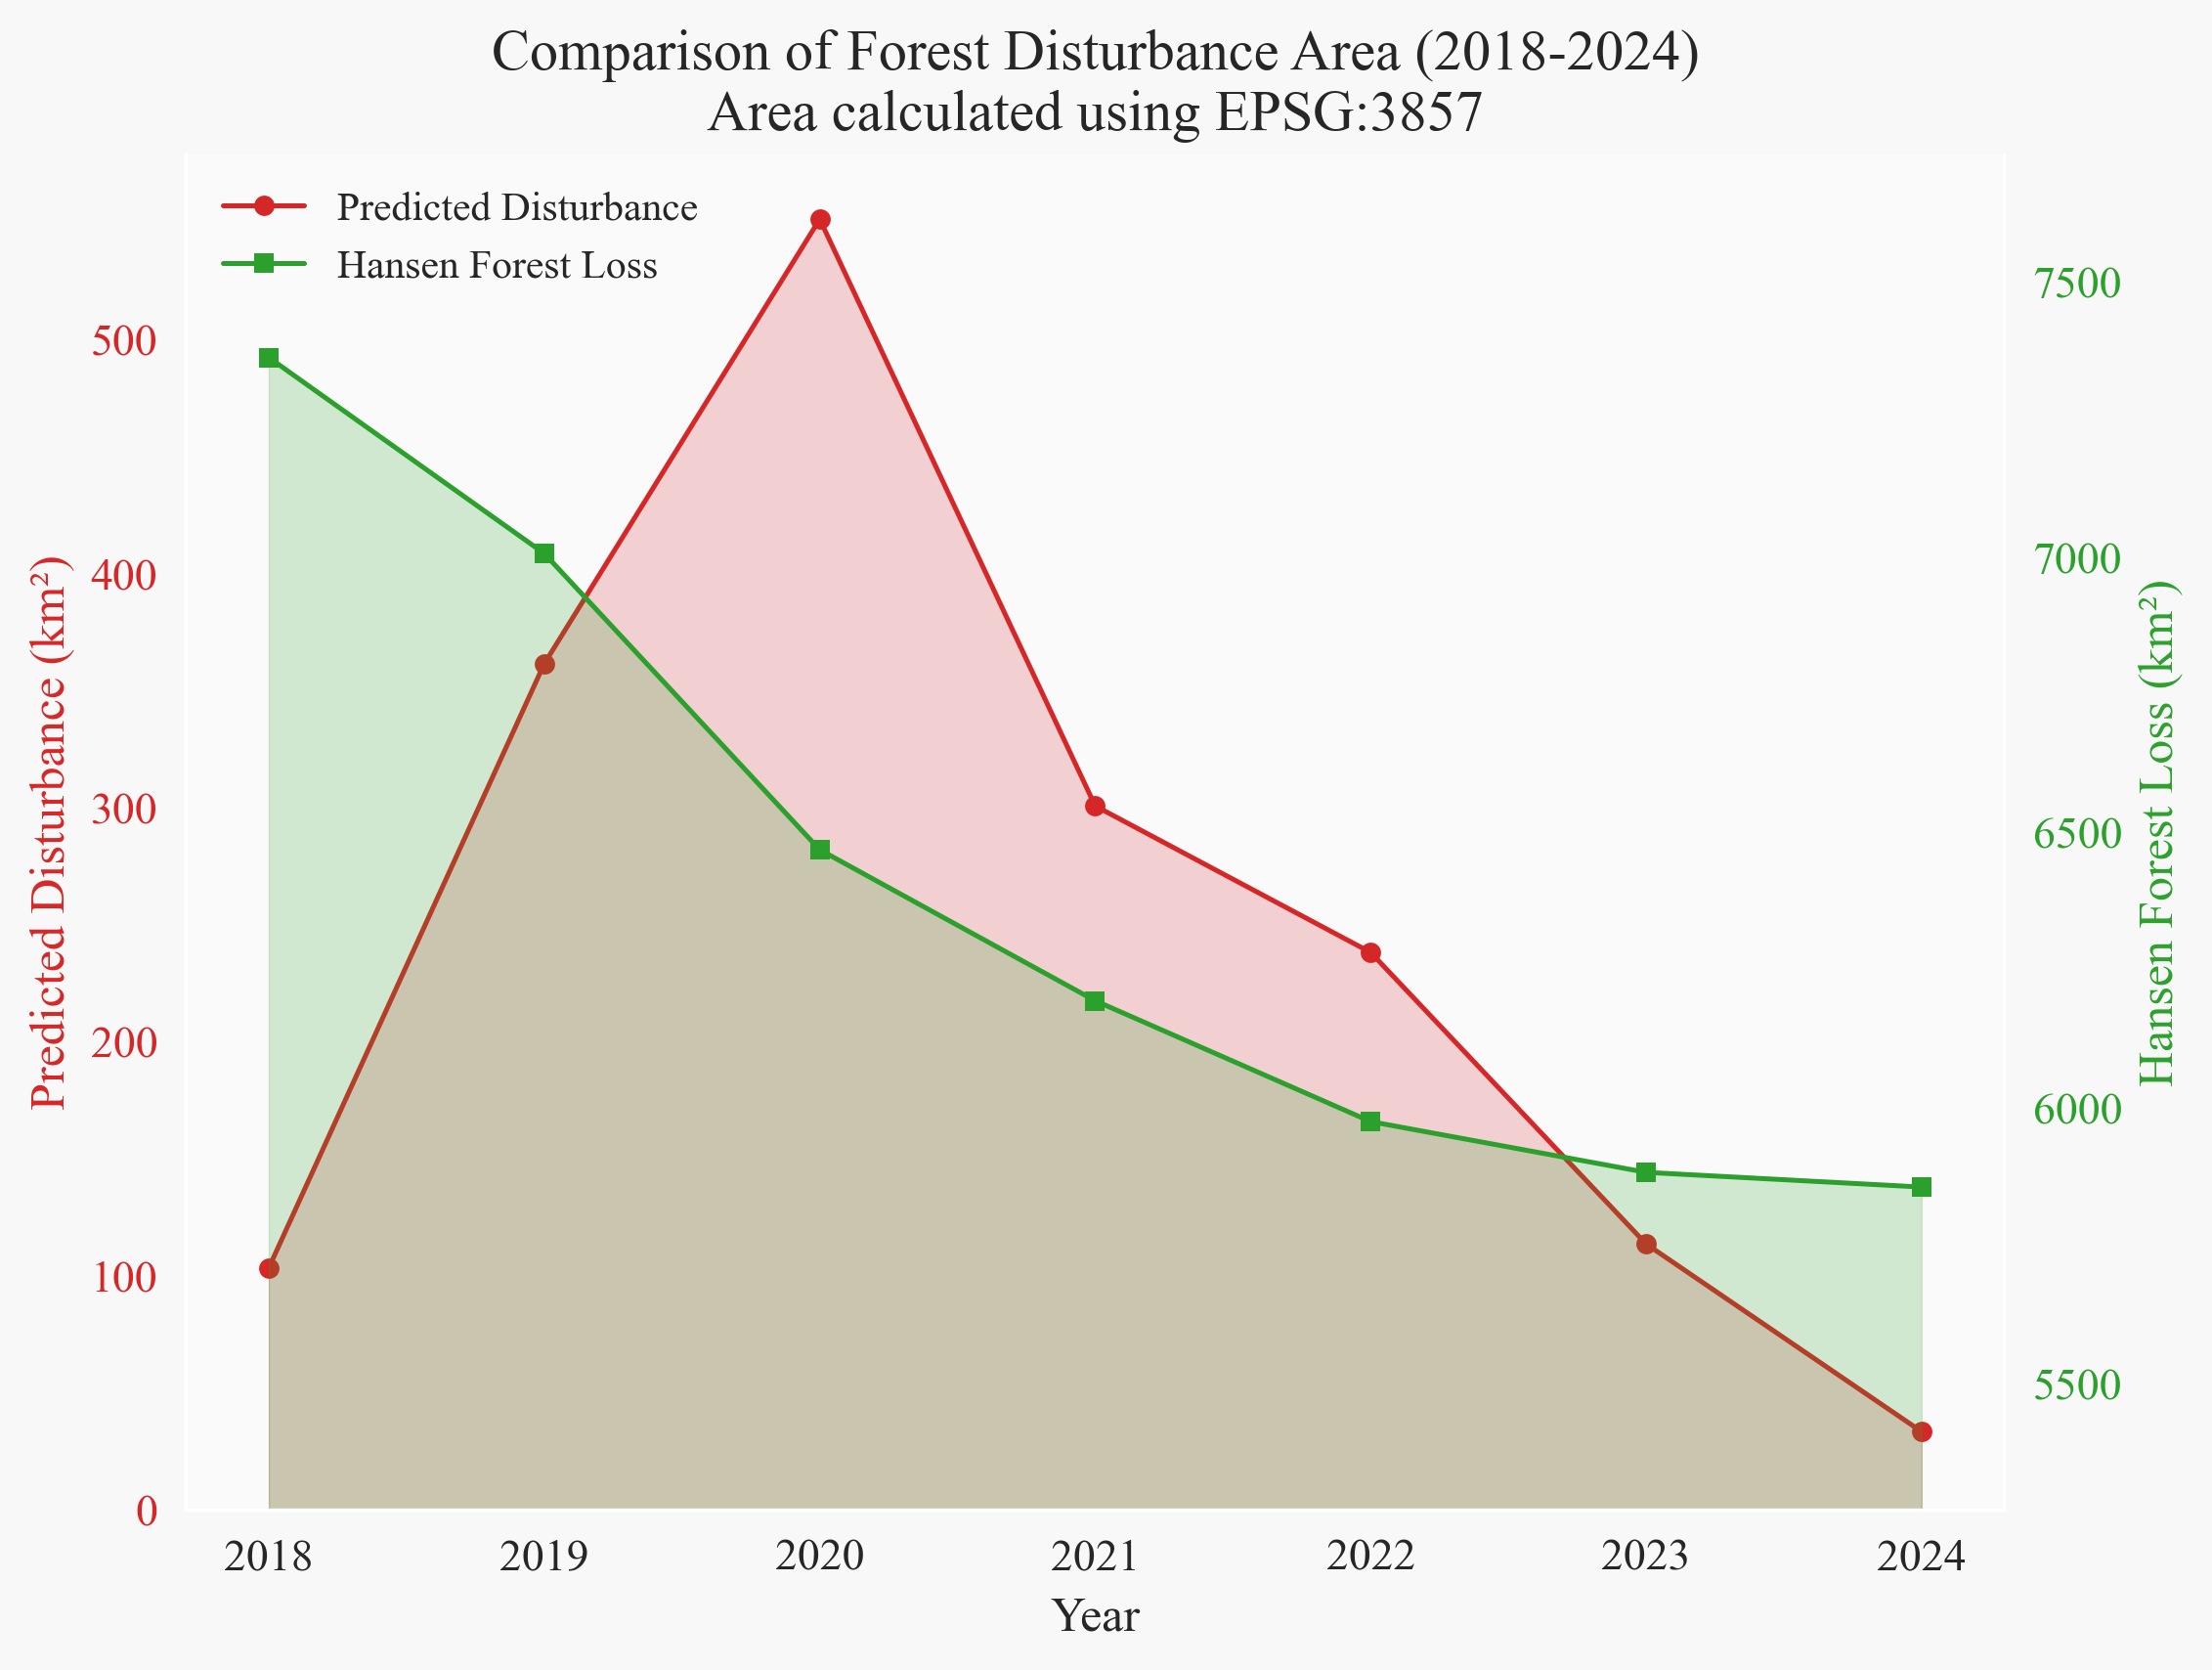


Forest Disturbance Results (2018-2024):
 Year  Disturbed Area (User) km²  Disturbed Area (Hansen) km²
 2018                 103.406428                  7361.920863
 2019                 361.572897                  7006.277665
 2020                 551.515988                  6468.710287
 2021                 300.782805                  6194.677070
 2022                 238.188849                  5975.393155
 2023                 113.611098                  5883.268721
 2024                  33.399477                  5856.566554

Pixel Size Information:
 Year User Pixel Size (m) Hansen Pixel Size (m)
 2018         10.93x10.93           10.93x10.93
 2019         10.93x10.93           10.93x10.93
 2020         10.93x10.93           10.93x10.93
 2021         10.93x10.93           10.93x10.93
 2022         10.93x10.93           10.93x10.93
 2023         10.93x10.93           10.93x10.93
 2024         10.93x10.93           10.93x10.93


In [3]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
from rasterio.warp import calculate_default_transform, reproject, Resampling
import pyproj
import os

# Use a clean style without grid
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.grid'] = False  # Explicitly turn off grid

# Function to check if CRS is appropriate for area calculations
def is_projected_crs(crs):
    """Check if the coordinate reference system is projected (suitable for area calculations)."""
    if crs is None:
        return False
    
    # Convert to pyproj CRS if needed
    if not isinstance(crs, pyproj.CRS):
        crs = pyproj.CRS.from_user_input(crs)
    
    return crs.is_projected

# Function to calculate the actual area of pixels with value 1 with detailed validation
def calculate_disturbed_area(raster_path, target_crs=None, reproject_if_needed=True, verbose=True):
    """
    Calculate the area of disturbed pixels (value=1) in square kilometers.
    
    Args:
        raster_path: Path to the raster file
        target_crs: Target CRS to reproject to if original is not projected
        reproject_if_needed: Whether to reproject if CRS is not suitable for area calculations
        verbose: Whether to print detailed information
    
    Returns:
        disturbed_area_sqkm: Disturbed area in square kilometers
        metadata: Dictionary with detailed metadata about the calculation
    """
    metadata = {
        "file": os.path.basename(raster_path),
        "original_crs": None,
        "is_projected": False,
        "pixel_width_m": None,
        "pixel_height_m": None,
        "pixel_area_m2": None,
        "disturbed_pixels": 0,
        "total_pixels": 0,
        "reprojected": False,
        "target_crs": target_crs
    }
    
    # Open the original raster to check properties
    with rasterio.open(raster_path) as src:
        original_crs = src.crs
        metadata["original_crs"] = str(original_crs)
        metadata["is_projected"] = is_projected_crs(original_crs)
        
        # Get original dimensions
        width, height = src.width, src.height
        metadata["total_pixels"] = width * height
        
        # Read data directly if CRS is already projected
        if metadata["is_projected"] or not reproject_if_needed:
            # Get spatial resolution from transform
            transform = src.transform
            pixel_width_m = abs(transform[0])  # width in meters
            pixel_height_m = abs(transform[4])  # height in meters
            
            metadata["pixel_width_m"] = pixel_width_m
            metadata["pixel_height_m"] = pixel_height_m
            metadata["pixel_area_m2"] = pixel_width_m * pixel_height_m
            
            # Read the data and get the disturbance mask
            data = src.read(1)  # Read the first band
            disturbed_mask = data == 1  # Create boolean mask where True is disturbed
            metadata["disturbed_pixels"] = np.sum(disturbed_mask)
            
            # Calculate total disturbed area in square kilometers
            disturbed_area_sqkm = (metadata["disturbed_pixels"] * metadata["pixel_area_m2"]) / 1_000_000
        
        # Reproject if needed and requested
        elif reproject_if_needed and target_crs is not None:
            metadata["reprojected"] = True
            
            if verbose:
                print(f"Reprojecting {os.path.basename(raster_path)} to {target_crs}")
            
            # Calculate new transform and dimensions
            dst_transform, dst_width, dst_height = calculate_default_transform(
                src.crs, target_crs, src.width, src.height, *src.bounds)
            
            # Create in-memory reprojected raster
            dst_data = np.zeros((dst_height, dst_width), dtype=np.uint8)
            
            # Reproject
            reproject(
                source=rasterio.band(src, 1),
                destination=dst_data,
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=dst_transform,
                dst_crs=target_crs,
                resampling=Resampling.nearest
            )
            
            # Calculate area using the reprojected data
            pixel_width_m = abs(dst_transform[0])
            pixel_height_m = abs(dst_transform[4])
            
            metadata["pixel_width_m"] = pixel_width_m
            metadata["pixel_height_m"] = pixel_height_m
            metadata["pixel_area_m2"] = pixel_width_m * pixel_height_m
            
            disturbed_mask = dst_data == 1
            metadata["disturbed_pixels"] = np.sum(disturbed_mask)
            metadata["total_pixels"] = dst_width * dst_height
            
            # Calculate total disturbed area in square kilometers
            disturbed_area_sqkm = (metadata["disturbed_pixels"] * metadata["pixel_area_m2"]) / 1_000_000
        
        else:
            # Cannot calculate accurate area without proper projection
            if verbose:
                print(f"WARNING: {os.path.basename(raster_path)} is not in a projected CRS and no target CRS provided.")
                print("Area calculation may be inaccurate.")
            
            # Approximate calculation - not recommended but will return something
            transform = src.transform
            # Assuming degrees, convert to approximate meters at the equator (very rough)
            approx_m_per_degree = 111320  # approximate meters per degree at the equator
            pixel_width_m = abs(transform[0]) * approx_m_per_degree
            pixel_height_m = abs(transform[4]) * approx_m_per_degree
            
            metadata["pixel_width_m"] = pixel_width_m
            metadata["pixel_height_m"] = pixel_height_m
            metadata["pixel_area_m2"] = pixel_width_m * pixel_height_m
            
            # Read the data and get the disturbance mask
            data = src.read(1)
            disturbed_mask = data == 1
            metadata["disturbed_pixels"] = np.sum(disturbed_mask)
            
            # Calculate total disturbed area in square kilometers (with warning)
            disturbed_area_sqkm = (metadata["disturbed_pixels"] * metadata["pixel_area_m2"]) / 1_000_000
    
    # Print detailed information if verbose
    if verbose:
        print(f"\nFile: {os.path.basename(raster_path)}")
        print(f"CRS: {metadata['original_crs']}")
        print(f"Is projected: {metadata['is_projected']}")
        if metadata["reprojected"]:
            print(f"Reprojected to: {metadata['target_crs']}")
        print(f"Pixel dimensions: {metadata['pixel_width_m']:.2f}m x {metadata['pixel_height_m']:.2f}m")
        print(f"Pixel area: {metadata['pixel_area_m2']:.2f} m²")
        print(f"Disturbed pixels: {metadata['disturbed_pixels']} ({metadata['disturbed_pixels']/metadata['total_pixels']*100:.2f}% of total)")
        print(f"Total disturbed area: {disturbed_area_sqkm:.2f} km²")
    
    return disturbed_area_sqkm, metadata

# Function to check if all rasters are in the same CRS
def check_raster_consistency(raster_paths):
    """Check if all rasters have the same CRS and resolution."""
    if not raster_paths:
        return True, "No rasters to check"
    
    first_crs = None
    first_res = None
    inconsistencies = []
    
    for path in raster_paths:
        with rasterio.open(path) as src:
            crs = src.crs
            transform = src.transform
            res = (abs(transform[0]), abs(transform[4]))
            
            if first_crs is None:
                first_crs = crs
                first_res = res
            else:
                if crs != first_crs:
                    inconsistencies.append(f"{os.path.basename(path)} has different CRS: {crs} (expected {first_crs})")
                if res != first_res:
                    inconsistencies.append(f"{os.path.basename(path)} has different resolution: {res} (expected {first_res})")
    
    return len(inconsistencies) == 0, inconsistencies

# Paths to your disturbance raster files and Hansen dataset rasters
disturbance_rasters = {
    "2018": "predicted_core_2018.tif",
    "2019": "predicted_core_2019.tif",
    "2020": "predicted_core_2020.tif",
    "2021": "predicted_core_2021.tif",
    "2022": "predicted_core_2022.tif",
    "2023": "predicted_core_2023.tif",
    "2024": "predicted_core_2024.tif"
}

hansen_rasters = {
    "2018": "forest_2018_4.tif",
    "2019": "forest_2019_4.tif",
    "2020": "forest_2020_4.tif",
    "2021": "forest_2021_4.tif",
    "2022": "forest_2022_4.tif",
    "2023": "forest_2023_4.tif",
    "2024": "forest_2024_4.tif"
}

# Check raster consistency before calculations
print("Checking raster consistency...")
print("\nUser disturbance rasters:")
consistent, details = check_raster_consistency(disturbance_rasters.values())
print("Consistent:" if consistent else "Inconsistent:", details if not consistent else "All rasters have same CRS and resolution")

print("\nHansen forest loss rasters:")
consistent, details = check_raster_consistency(hansen_rasters.values())
print("Consistent:" if consistent else "Inconsistent:", details if not consistent else "All rasters have same CRS and resolution")

# Define a suitable projected CRS for area calculations
# EPSG:3857 (Web Mercator) is common but distorts areas at high latitudes
# For more accurate area calculations, use a UTM zone or other local projection
# Example: EPSG:32630 for UTM zone 30N
# You may need to adjust this based on your study area
target_crs = "EPSG:3857"  # Web Mercator - adjust as needed

# Calculate actual disturbed areas for both datasets
results = []
all_metadata = {
    "User": {},
    "Hansen": {}
}

print("\nCalculating areas...")
for year in disturbance_rasters.keys():
    print(f"\n--- Processing Year {year} ---")
    
    print("\nUser disturbance dataset:")
    area_user, metadata_user = calculate_disturbed_area(
        disturbance_rasters[year],
        target_crs=target_crs,
        reproject_if_needed=True,
        verbose=True
    )
    all_metadata["User"][year] = metadata_user
    
    print("\nHansen forest loss dataset:")
    area_hansen, metadata_hansen = calculate_disturbed_area(
        hansen_rasters[year],
        target_crs=target_crs,
        reproject_if_needed=True,
        verbose=True
    )
    all_metadata["Hansen"][year] = metadata_hansen
    
    results.append({
        "Year": year,
        "Disturbed Area (User) km²": area_user,
        "Disturbed Area (Hansen) km²": area_hansen,
        "User Pixel Size (m)": f"{metadata_user['pixel_width_m']:.2f}x{metadata_user['pixel_height_m']:.2f}",
        "Hansen Pixel Size (m)": f"{metadata_hansen['pixel_width_m']:.2f}x{metadata_hansen['pixel_height_m']:.2f}"
    })

# Convert results to a DataFrame and convert Year to integer
results_df = pd.DataFrame(results)
results_df["Year"] = results_df["Year"].astype(int)
results_df = results_df.sort_values("Year")  # Ensure data is sorted by year

# Save the detailed results to CSV
results_df.to_csv("forest_disturbance_results_detailed.csv", index=False)

# Save additional CSVs with specific information
# Basic results (just years and areas)
plot_df = results_df[["Year", "Disturbed Area (User) km²", "Disturbed Area (Hansen) km²"]]
plot_df.to_csv("forest_disturbance_basic_results.csv", index=False)

# Pixel size information
pixel_info_df = results_df[["Year", "User Pixel Size (m)", "Hansen Pixel Size (m)"]]
pixel_info_df.to_csv("pixel_size_info.csv", index=False)

# Create a summary DataFrame with the basic columns for plotting
plot_df = results_df[["Year", "Disturbed Area (User) km²", "Disturbed Area (Hansen) km²"]]

# Colors for the plots
user_color = '#D62728'  # red for disturbed forest
hansen_color = '#2CA02C'  # green for Hansen

# Create a single plot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=300)

# Plot predicted disturbance on the left y-axis
ax1.plot(plot_df["Year"], plot_df["Disturbed Area (User) km²"],
         label="Predicted Disturbance", marker='o', color=user_color,
         linewidth=1.2, markersize=5)

# Get min values for both datasets to align the bottom of the shading
min_user = 0
min_hansen = min(plot_df["Disturbed Area (Hansen) km²"]) * 0.9  # slightly below minimum for visual clarity

# Set y-limits for the first axis
ax1.set_ylim(min_user, max(plot_df["Disturbed Area (User) km²"]) * 1.05)

# Add semi-transparent shading under the first line 
ax1.fill_between(plot_df["Year"], min_user, plot_df["Disturbed Area (User) km²"], 
                 color=user_color, alpha=0.2)

ax1.set_ylabel("Predicted Disturbance (km²)", color=user_color)
ax1.tick_params(axis='y', colors=user_color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot Hansen forest loss on the right y-axis
ax2.plot(plot_df["Year"], plot_df["Disturbed Area (Hansen) km²"],
         label="Hansen Forest Loss", marker='s', color=hansen_color,
         linewidth=1.2, markersize=5)

# Set y-limits for the Hansen Forest Loss axis
max_hansen = max(plot_df["Disturbed Area (Hansen) km²"]) * 1.05
ax2.set_ylim(min_hansen, max_hansen)

# Add semi-transparent shading under the second line
ax2.fill_between(plot_df["Year"], min_hansen, plot_df["Disturbed Area (Hansen) km²"], 
                 color=hansen_color, alpha=0.2)

ax2.set_ylabel("Hansen Forest Loss (km²)", color=hansen_color)
ax2.tick_params(axis='y', colors=hansen_color)

# Set x-axis label and title
ax1.set_xlabel("Year")
projection_note = f"Area calculated using {target_crs}" if target_crs else "Area calculation based on original projections"
ax1.set_title(f"Comparison of Forest Disturbance Area (2018-2024)\n{projection_note}")

# Ensure all grids are turned off
ax1.grid(False)
ax2.grid(False)

# Adjust spines for a clean look
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='upper left')

# Ensure x-axis ticks are at integer years
ax1.set_xticks(plot_df["Year"])

# Add subtle background colors
fig.patch.set_facecolor('#F8F8F8')
ax1.set_facecolor('#FAFAFA')

# Save the plot as a PDF and PNG
fig.savefig("forest_disturbance_comparison.pdf", bbox_inches='tight', dpi=300)
fig.savefig("forest_disturbance_comparison.png", bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Print the results table
print("\nForest Disturbance Results (2018-2024):")
print(plot_df.to_string(index=False))

# Print pixel size information
print("\nPixel Size Information:")
pixel_info_df = results_df[["Year", "User Pixel Size (m)", "Hansen Pixel Size (m)"]]
print(pixel_info_df.to_string(index=False))

Checking raster consistency...

User disturbance rasters:
Inconsistent: ['predicted_core_2021.tif has different resolution: (8.983152841195218e-05, 8.983152841195218e-05) (expected (8.983152841195211e-05, 8.983152841195211e-05))']

Hansen forest loss rasters:
Consistent: All rasters have same CRS and resolution

Calculating areas...

--- Processing Year 2018 ---

User disturbance dataset:
Reprojecting predicted_core_2018.tif to EPSG:3857

File: predicted_core_2018.tif
CRS: EPSG:4326
Is projected: False
Reprojected to: EPSG:3857
Pixel dimensions: 10.93m x 10.93m
Pixel area: 119.36 m²
Disturbed pixels: 866352 (0.26% of total)
Total disturbed area: 103.41 km²

Hansen forest loss dataset:
Reprojecting forest_2018_7.tif to EPSG:3857

File: forest_2018_7.tif
CRS: EPSG:4326
Is projected: False
Reprojected to: EPSG:3857
Pixel dimensions: 10.93m x 10.93m
Pixel area: 119.36 m²
Disturbed pixels: 49204846 (14.79% of total)
Total disturbed area: 5873.11 km²

--- Processing Year 2019 ---

User distu

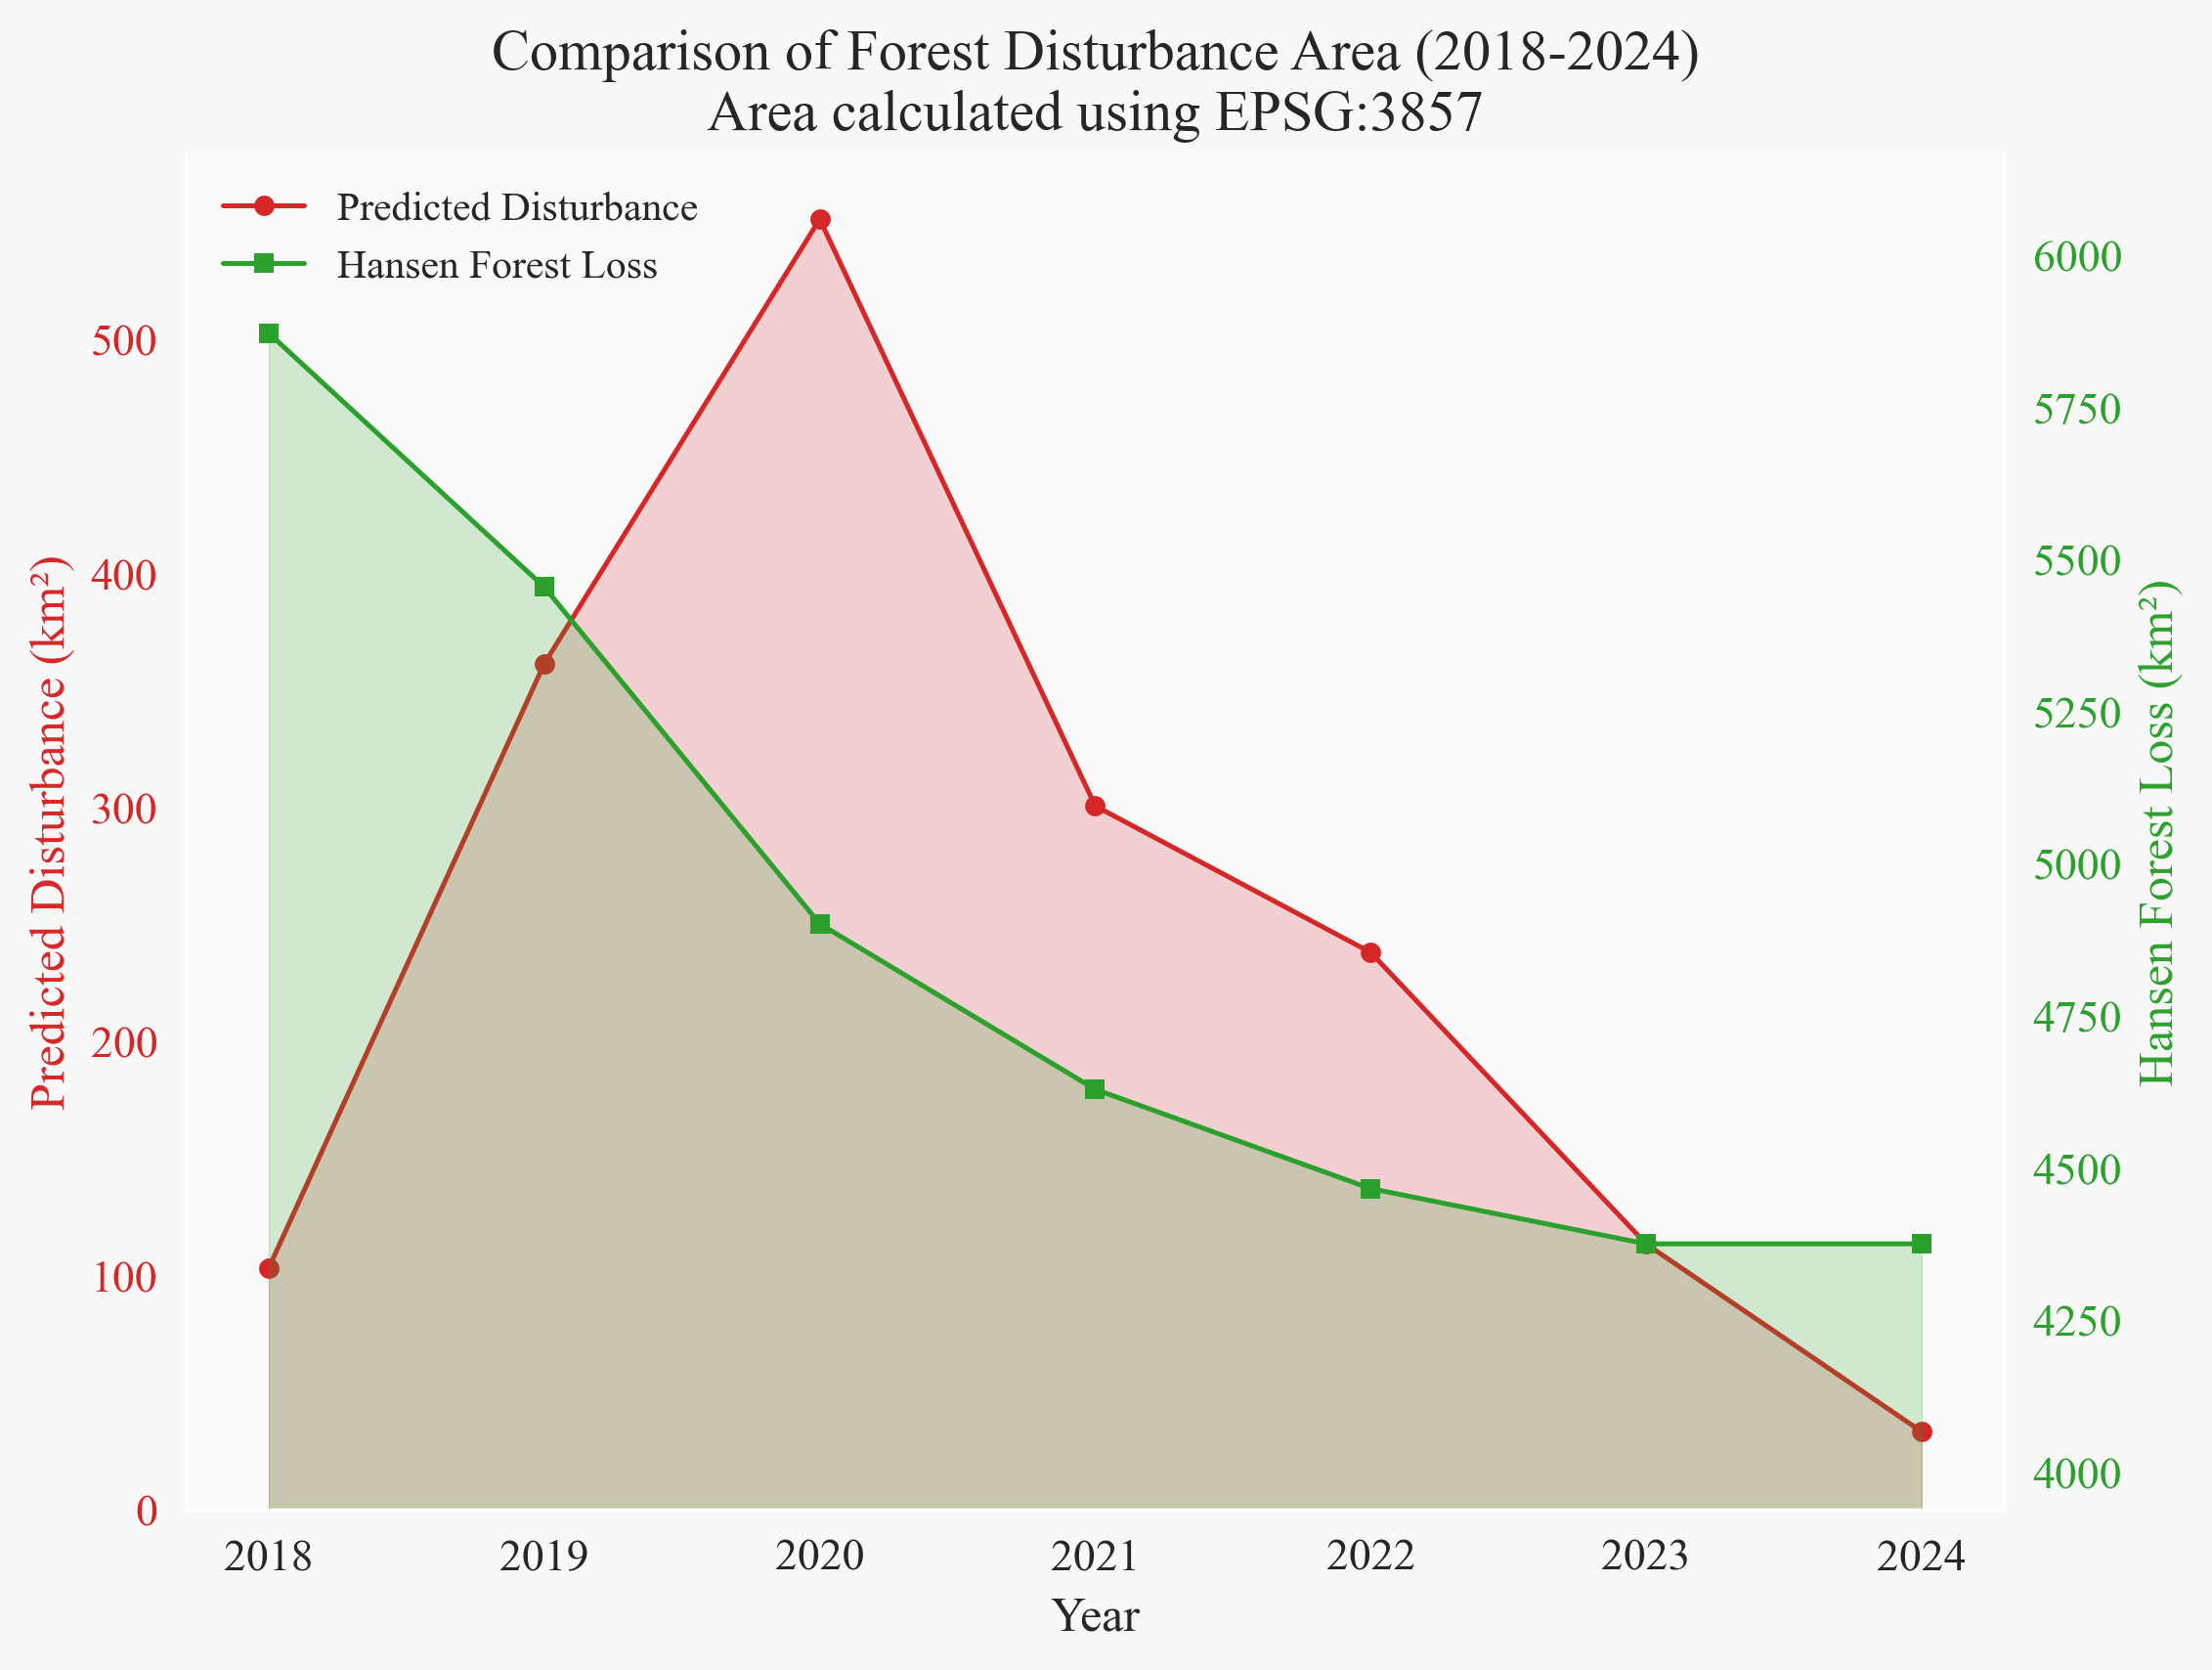


Forest Disturbance Results (2018-2024):
 Year  Disturbed Area (User) km²  Disturbed Area (Hansen) km²
 2018                 103.406428                  5873.109188
 2019                 361.572897                  5455.414217
 2020                 551.515988                  4901.410168
 2021                 300.782805                  4629.169429
 2022                 238.188849                  4465.899109
 2023                 113.611098                  4374.944230
 2024                  33.399477                  4374.941008

Pixel Size Information:
 Year User Pixel Size (m) Hansen Pixel Size (m)
 2018         10.93x10.93           10.93x10.93
 2019         10.93x10.93           10.93x10.93
 2020         10.93x10.93           10.93x10.93
 2021         10.93x10.93           10.93x10.93
 2022         10.93x10.93           10.93x10.93
 2023         10.93x10.93           10.93x10.93
 2024         10.93x10.93           10.93x10.93

All CSV and Excel files have been saved to the 'fores

In [14]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
from rasterio.warp import calculate_default_transform, reproject, Resampling
import pyproj
import os
import datetime

# Use a clean style without grid
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.grid'] = False  # Explicitly turn off grid

# Function to check if CRS is appropriate for area calculations
def is_projected_crs(crs):
    """Check if the coordinate reference system is projected (suitable for area calculations)."""
    if crs is None:
        return False
    
    # Convert to pyproj CRS if needed
    if not isinstance(crs, pyproj.CRS):
        crs = pyproj.CRS.from_user_input(crs)
    
    return crs.is_projected

# Function to calculate the actual area of pixels with value 1 with detailed validation
def calculate_disturbed_area(raster_path, target_crs=None, reproject_if_needed=True, verbose=True):
    """
    Calculate the area of disturbed pixels (value=1) in square kilometers.
    
    Args:
        raster_path: Path to the raster file
        target_crs: Target CRS to reproject to if original is not projected
        reproject_if_needed: Whether to reproject if CRS is not suitable for area calculations
        verbose: Whether to print detailed information
    
    Returns:
        disturbed_area_sqkm: Disturbed area in square kilometers
        metadata: Dictionary with detailed metadata about the calculation
    """
    metadata = {
        "file": os.path.basename(raster_path),
        "original_crs": None,
        "is_projected": False,
        "pixel_width_m": None,
        "pixel_height_m": None,
        "pixel_area_m2": None,
        "disturbed_pixels": 0,
        "total_pixels": 0,
        "reprojected": False,
        "target_crs": target_crs
    }
    
    # Open the original raster to check properties
    with rasterio.open(raster_path) as src:
        original_crs = src.crs
        metadata["original_crs"] = str(original_crs)
        metadata["is_projected"] = is_projected_crs(original_crs)
        
        # Get original dimensions
        width, height = src.width, src.height
        metadata["total_pixels"] = width * height
        
        # Read data directly if CRS is already projected
        if metadata["is_projected"] or not reproject_if_needed:
            # Get spatial resolution from transform
            transform = src.transform
            pixel_width_m = abs(transform[0])  # width in meters
            pixel_height_m = abs(transform[4])  # height in meters
            
            metadata["pixel_width_m"] = pixel_width_m
            metadata["pixel_height_m"] = pixel_height_m
            metadata["pixel_area_m2"] = pixel_width_m * pixel_height_m
            
            # Read the data and get the disturbance mask
            data = src.read(1)  # Read the first band
            disturbed_mask = data == 1  # Create boolean mask where True is disturbed
            metadata["disturbed_pixels"] = np.sum(disturbed_mask)
            
            # Calculate total disturbed area in square kilometers
            disturbed_area_sqkm = (metadata["disturbed_pixels"] * metadata["pixel_area_m2"]) / 1_000_000
        
        # Reproject if needed and requested
        elif reproject_if_needed and target_crs is not None:
            metadata["reprojected"] = True
            
            if verbose:
                print(f"Reprojecting {os.path.basename(raster_path)} to {target_crs}")
            
            # Calculate new transform and dimensions
            dst_transform, dst_width, dst_height = calculate_default_transform(
                src.crs, target_crs, src.width, src.height, *src.bounds)
            
            # Create in-memory reprojected raster
            dst_data = np.zeros((dst_height, dst_width), dtype=np.uint8)
            
            # Reproject
            reproject(
                source=rasterio.band(src, 1),
                destination=dst_data,
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=dst_transform,
                dst_crs=target_crs,
                resampling=Resampling.nearest
            )
            
            # Calculate area using the reprojected data
            pixel_width_m = abs(dst_transform[0])
            pixel_height_m = abs(dst_transform[4])
            
            metadata["pixel_width_m"] = pixel_width_m
            metadata["pixel_height_m"] = pixel_height_m
            metadata["pixel_area_m2"] = pixel_width_m * pixel_height_m
            
            disturbed_mask = dst_data == 1
            metadata["disturbed_pixels"] = np.sum(disturbed_mask)
            metadata["total_pixels"] = dst_width * dst_height
            
            # Calculate total disturbed area in square kilometers
            disturbed_area_sqkm = (metadata["disturbed_pixels"] * metadata["pixel_area_m2"]) / 1_000_000
        
        else:
            # Cannot calculate accurate area without proper projection
            if verbose:
                print(f"WARNING: {os.path.basename(raster_path)} is not in a projected CRS and no target CRS provided.")
                print("Area calculation may be inaccurate.")
            
            # Approximate calculation - not recommended but will return something
            transform = src.transform
            # Assuming degrees, convert to approximate meters at the equator (very rough)
            approx_m_per_degree = 111320  # approximate meters per degree at the equator
            pixel_width_m = abs(transform[0]) * approx_m_per_degree
            pixel_height_m = abs(transform[4]) * approx_m_per_degree
            
            metadata["pixel_width_m"] = pixel_width_m
            metadata["pixel_height_m"] = pixel_height_m
            metadata["pixel_area_m2"] = pixel_width_m * pixel_height_m
            
            # Read the data and get the disturbance mask
            data = src.read(1)
            disturbed_mask = data == 1
            metadata["disturbed_pixels"] = np.sum(disturbed_mask)
            
            # Calculate total disturbed area in square kilometers (with warning)
            disturbed_area_sqkm = (metadata["disturbed_pixels"] * metadata["pixel_area_m2"]) / 1_000_000
    
    # Print detailed information if verbose
    if verbose:
        print(f"\nFile: {os.path.basename(raster_path)}")
        print(f"CRS: {metadata['original_crs']}")
        print(f"Is projected: {metadata['is_projected']}")
        if metadata["reprojected"]:
            print(f"Reprojected to: {metadata['target_crs']}")
        print(f"Pixel dimensions: {metadata['pixel_width_m']:.2f}m x {metadata['pixel_height_m']:.2f}m")
        print(f"Pixel area: {metadata['pixel_area_m2']:.2f} m²")
        print(f"Disturbed pixels: {metadata['disturbed_pixels']} ({metadata['disturbed_pixels']/metadata['total_pixels']*100:.2f}% of total)")
        print(f"Total disturbed area: {disturbed_area_sqkm:.2f} km²")
    
    return disturbed_area_sqkm, metadata

# Function to check if all rasters are in the same CRS
def check_raster_consistency(raster_paths):
    """Check if all rasters have the same CRS and resolution."""
    if not raster_paths:
        return True, "No rasters to check"
    
    first_crs = None
    first_res = None
    inconsistencies = []
    
    for path in raster_paths:
        with rasterio.open(path) as src:
            crs = src.crs
            transform = src.transform
            res = (abs(transform[0]), abs(transform[4]))
            
            if first_crs is None:
                first_crs = crs
                first_res = res
            else:
                if crs != first_crs:
                    inconsistencies.append(f"{os.path.basename(path)} has different CRS: {crs} (expected {first_crs})")
                if res != first_res:
                    inconsistencies.append(f"{os.path.basename(path)} has different resolution: {res} (expected {first_res})")
    
    return len(inconsistencies) == 0, inconsistencies

# Function to export additional detailed CSV files
def export_detailed_csv_files(results_df, all_metadata, output_folder="csv_output"):
    """
    Export more detailed CSV files with various data views.
    
    Args:
        results_df: DataFrame with the main results
        all_metadata: Dictionary with detailed metadata
        output_folder: Folder to save CSV files
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Get current timestamp for filenames
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # 1. Export the main results with detailed precision
    results_df.to_csv(f"{output_folder}/forest_disturbance_results_detailed_{timestamp}.csv", index=False)
    
    # 2. Create and export a metadata summary
    metadata_rows = []
    for dataset_type in ["User", "Hansen"]:
        for year, metadata in all_metadata[dataset_type].items():
            row = {
                "Year": year,
                "Dataset": dataset_type,
                "File": metadata["file"],
                "Original CRS": metadata["original_crs"],
                "Is Projected": metadata["is_projected"],
                "Reprojected": metadata["reprojected"],
                "Target CRS": metadata["target_crs"] if metadata["reprojected"] else "N/A",
                "Pixel Width (m)": metadata["pixel_width_m"],
                "Pixel Height (m)": metadata["pixel_height_m"],
                "Pixel Area (m²)": metadata["pixel_area_m2"],
                "Disturbed Pixels": metadata["disturbed_pixels"],
                "Total Pixels": metadata["total_pixels"],
                "Disturbed Percentage": metadata["disturbed_pixels"] / metadata["total_pixels"] * 100 if metadata["total_pixels"] > 0 else 0
            }
            metadata_rows.append(row)
    
    metadata_df = pd.DataFrame(metadata_rows)
    metadata_df.to_csv(f"{output_folder}/metadata_summary_{timestamp}.csv", index=False)
    
    # 3. Create and export a year-by-year comparison with additional metrics
    comparison_rows = []
    for year in sorted(results_df["Year"].unique()):
        user_area = float(results_df[results_df["Year"] == year]["Disturbed Area (User) km²"].values[0])
        hansen_area = float(results_df[results_df["Year"] == year]["Disturbed Area (Hansen) km²"].values[0])
        
        row = {
            "Year": year,
            "User Disturbance (km²)": user_area,
            "Hansen Forest Loss (km²)": hansen_area,
            "Difference (km²)": user_area - hansen_area,
            "Ratio (User/Hansen)": user_area / hansen_area if hansen_area > 0 else "N/A",
            "User Percentage of Total": user_area / (user_area + hansen_area) * 100 if (user_area + hansen_area) > 0 else 0
        }
        comparison_rows.append(row)
    
    comparison_df = pd.DataFrame(comparison_rows)
    comparison_df.to_csv(f"{output_folder}/yearly_comparison_{timestamp}.csv", index=False)
    
    # 4. Export cumulative disturbance data
    cumulative_df = results_df.copy()
    cumulative_df["Cumulative User Disturbance (km²)"] = cumulative_df["Disturbed Area (User) km²"].cumsum()
    cumulative_df["Cumulative Hansen Forest Loss (km²)"] = cumulative_df["Disturbed Area (Hansen) km²"].cumsum()
    cumulative_df.to_csv(f"{output_folder}/cumulative_disturbance_{timestamp}.csv", index=False)
    
    # 5. Export pixel disturbance counts
    pixel_counts = []
    for year in sorted(all_metadata["User"].keys()):
        row = {
            "Year": year,
            "User Disturbed Pixels": all_metadata["User"][year]["disturbed_pixels"],
            "User Total Pixels": all_metadata["User"][year]["total_pixels"],
            "User Disturbance Percentage": all_metadata["User"][year]["disturbed_pixels"] / all_metadata["User"][year]["total_pixels"] * 100,
            "Hansen Disturbed Pixels": all_metadata["Hansen"][year]["disturbed_pixels"],
            "Hansen Total Pixels": all_metadata["Hansen"][year]["total_pixels"],
            "Hansen Disturbance Percentage": all_metadata["Hansen"][year]["disturbed_pixels"] / all_metadata["Hansen"][year]["total_pixels"] * 100
        }
        pixel_counts.append(row)
    
    pixel_counts_df = pd.DataFrame(pixel_counts)
    pixel_counts_df.to_csv(f"{output_folder}/pixel_disturbance_counts_{timestamp}.csv", index=False)
    
    # 6. Export a simplified summary for quick reference
    simple_summary = results_df[["Year", "Disturbed Area (User) km²", "Disturbed Area (Hansen) km²"]].copy()
    simple_summary.columns = ["Year", "User_Disturbance_km2", "Hansen_Forest_Loss_km2"]
    simple_summary.to_csv(f"{output_folder}/simple_summary_{timestamp}.csv", index=False)
    
    # Return the paths to all created files
    created_files = [
        f"{output_folder}/forest_disturbance_results_detailed_{timestamp}.csv",
        f"{output_folder}/metadata_summary_{timestamp}.csv",
        f"{output_folder}/yearly_comparison_{timestamp}.csv",
        f"{output_folder}/cumulative_disturbance_{timestamp}.csv",
        f"{output_folder}/pixel_disturbance_counts_{timestamp}.csv",
        f"{output_folder}/simple_summary_{timestamp}.csv"
    ]
    
    return created_files

# Paths to your disturbance raster files and Hansen dataset rasters
disturbance_rasters = {
    "2018": "predicted_core_2018.tif",
    "2019": "predicted_core_2019.tif",
    "2020": "predicted_core_2020.tif",
    "2021": "predicted_core_2021.tif",
    "2022": "predicted_core_2022.tif",
    "2023": "predicted_core_2023.tif",
    "2024": "predicted_core_2024.tif"
}

hansen_rasters = {
    "2018": "forest_2018_7.tif",
    "2019": "forest_2019_7.tif",
    "2020": "forest_2020_7.tif",
    "2021": "forest_2021_7.tif",
    "2022": "forest_2022_7.tif",
    "2023": "forest_2023_7.tif",
    "2024": "forest_2024_7.tif"
}

# Check raster consistency before calculations
print("Checking raster consistency...")
print("\nUser disturbance rasters:")
consistent, details = check_raster_consistency(disturbance_rasters.values())
print("Consistent:" if consistent else "Inconsistent:", details if not consistent else "All rasters have same CRS and resolution")

print("\nHansen forest loss rasters:")
consistent, details = check_raster_consistency(hansen_rasters.values())
print("Consistent:" if consistent else "Inconsistent:", details if not consistent else "All rasters have same CRS and resolution")

# Define a suitable projected CRS for area calculations
# EPSG:3857 (Web Mercator) is common but distorts areas at high latitudes
# For more accurate area calculations, use a UTM zone or other local projection
# Example: EPSG:32630 for UTM zone 30N
# You may need to adjust this based on your study area
target_crs = "EPSG:3857"  # Web Mercator - adjust as needed

# Calculate actual disturbed areas for both datasets
results = []
all_metadata = {
    "User": {},
    "Hansen": {}
}

print("\nCalculating areas...")
for year in disturbance_rasters.keys():
    print(f"\n--- Processing Year {year} ---")
    
    print("\nUser disturbance dataset:")
    area_user, metadata_user = calculate_disturbed_area(
        disturbance_rasters[year],
        target_crs=target_crs,
        reproject_if_needed=True,
        verbose=True
    )
    all_metadata["User"][year] = metadata_user
    
    print("\nHansen forest loss dataset:")
    area_hansen, metadata_hansen = calculate_disturbed_area(
        hansen_rasters[year],
        target_crs=target_crs,
        reproject_if_needed=True,
        verbose=True
    )
    all_metadata["Hansen"][year] = metadata_hansen
    
    results.append({
        "Year": year,
        "Disturbed Area (User) km²": area_user,
        "Disturbed Area (Hansen) km²": area_hansen,
        "User Pixel Size (m)": f"{metadata_user['pixel_width_m']:.2f}x{metadata_user['pixel_height_m']:.2f}",
        "Hansen Pixel Size (m)": f"{metadata_hansen['pixel_width_m']:.2f}x{metadata_hansen['pixel_height_m']:.2f}"
    })

# Convert results to a DataFrame and convert Year to integer
results_df = pd.DataFrame(results)
results_df["Year"] = results_df["Year"].astype(int)
results_df = results_df.sort_values("Year")  # Ensure data is sorted by year

# Create a folder for all CSV outputs
csv_output_folder = "forest_disturbance_csv_results"
os.makedirs(csv_output_folder, exist_ok=True)

# Save the detailed results to CSV
results_df.to_csv(f"{csv_output_folder}/forest_disturbance_results_detailed.csv", index=False)

# Save additional CSVs with specific information
# Basic results (just years and areas)
plot_df = results_df[["Year", "Disturbed Area (User) km²", "Disturbed Area (Hansen) km²"]]
plot_df.to_csv(f"{csv_output_folder}/forest_disturbance_basic_results.csv", index=False)

# Pixel size information
pixel_info_df = results_df[["Year", "User Pixel Size (m)", "Hansen Pixel Size (m)"]]
pixel_info_df.to_csv(f"{csv_output_folder}/pixel_size_info.csv", index=False)

# Export all detailed CSVs
created_files = export_detailed_csv_files(results_df, all_metadata, output_folder=csv_output_folder)
print(f"\nCreated the following CSV files:")
for file in created_files:
    print(f"- {file}")

# Create a summary DataFrame with the basic columns for plotting
plot_df = results_df[["Year", "Disturbed Area (User) km²", "Disturbed Area (Hansen) km²"]]

# Export additional formats for easier data sharing
# Export as Excel file
excel_path = f"{csv_output_folder}/forest_disturbance_analysis.xlsx"
with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
    plot_df.to_excel(writer, sheet_name='Basic Results', index=False)
    results_df.to_excel(writer, sheet_name='Detailed Results', index=False)
    pixel_info_df.to_excel(writer, sheet_name='Pixel Information', index=False)
    
    # Create a sheet with annual differences
    diff_df = plot_df.copy()
    diff_df["Difference (User - Hansen) km²"] = diff_df["Disturbed Area (User) km²"] - diff_df["Disturbed Area (Hansen) km²"]
    diff_df["Ratio (User/Hansen)"] = diff_df["Disturbed Area (User) km²"] / diff_df["Disturbed Area (Hansen) km²"]
    diff_df.to_excel(writer, sheet_name='Comparison', index=False)
    
    # Create a sheet with cumulative values
    cumulative_df = plot_df.copy()
    cumulative_df["Cumulative User Disturbance (km²)"] = cumulative_df["Disturbed Area (User) km²"].cumsum()
    cumulative_df["Cumulative Hansen Forest Loss (km²)"] = cumulative_df["Disturbed Area (Hansen) km²"].cumsum()
    cumulative_df.to_excel(writer, sheet_name='Cumulative Values', index=False)

print(f"Excel file created: {excel_path}")

# Colors for the plots
user_color = '#D62728'  # red for disturbed forest
hansen_color = '#2CA02C'  # green for Hansen

# Create a single plot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=300)

# Plot predicted disturbance on the left y-axis
ax1.plot(plot_df["Year"], plot_df["Disturbed Area (User) km²"],
         label="Predicted Disturbance", marker='o', color=user_color,
         linewidth=1.2, markersize=5)

# Get min values for both datasets to align the bottom of the shading
min_user = 0
min_hansen = min(plot_df["Disturbed Area (Hansen) km²"]) * 0.9  # slightly below minimum for visual clarity

# Set y-limits for the first axis
ax1.set_ylim(min_user, max(plot_df["Disturbed Area (User) km²"]) * 1.05)

# Add semi-transparent shading under the first line 
ax1.fill_between(plot_df["Year"], min_user, plot_df["Disturbed Area (User) km²"], 
                 color=user_color, alpha=0.2)

ax1.set_ylabel("Predicted Disturbance (km²)", color=user_color)
ax1.tick_params(axis='y', colors=user_color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot Hansen forest loss on the right y-axis
ax2.plot(plot_df["Year"], plot_df["Disturbed Area (Hansen) km²"],
         label="Hansen Forest Loss", marker='s', color=hansen_color,
         linewidth=1.2, markersize=5)

# Set y-limits for the Hansen Forest Loss axis
max_hansen = max(plot_df["Disturbed Area (Hansen) km²"]) * 1.05
ax2.set_ylim(min_hansen, max_hansen)

# Add semi-transparent shading under the second line
ax2.fill_between(plot_df["Year"], min_hansen, plot_df["Disturbed Area (Hansen) km²"], 
                 color=hansen_color, alpha=0.2)

ax2.set_ylabel("Hansen Forest Loss (km²)", color=hansen_color)
ax2.tick_params(axis='y', colors=hansen_color)

# Set x-axis label and title
ax1.set_xlabel("Year")
projection_note = f"Area calculated using {target_crs}" if target_crs else "Area calculation based on original projections"
ax1.set_title(f"Comparison of Forest Disturbance Area (2018-2024)\n{projection_note}")

# Ensure all grids are turned off
ax1.grid(False)
ax2.grid(False)

# Adjust spines for a clean look
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='upper left')

# Ensure x-axis ticks are at integer years
ax1.set_xticks(plot_df["Year"])

# Add subtle background colors
fig.patch.set_facecolor('#F8F8F8')
ax1.set_facecolor('#FAFAFA')

# Save the plot as a PDF and PNG
fig.savefig(f"{csv_output_folder}/forest_disturbance_comparison.pdf", bbox_inches='tight', dpi=300)
fig.savefig(f"{csv_output_folder}/forest_disturbance_comparison.png", bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Print the results table
print("\nForest Disturbance Results (2018-2024):")
print(plot_df.to_string(index=False))

# Print pixel size information
print("\nPixel Size Information:")
pixel_info_df = results_df[["Year", "User Pixel Size (m)", "Hansen Pixel Size (m)"]]
print(pixel_info_df.to_string(index=False))

# Print information about where CSV files are saved
print(f"\nAll CSV and Excel files have been saved to the '{csv_output_folder}' directory.")
print(f"Excel summary file: {excel_path}")